# Energy Dataset Exploratory Data Analysis

This dataset is taken from a [Git Repository](https://github.com/LuisM78/Appliances-energy-prediction-data) of data for the publication:

Data driven prediction models of energy use of appliances in a low-energy house. Luis M. Candanedo, Véronique Feldheim, Dominique Deramaix. Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788, http://dx.doi.org/10.1016/j.enbuild.2017.01.083.

## The Task

Do an Exploratory Data Analysis on the energy dataset. <br> Keeping in mind : **Understand energy usage by appliances and the attributes that contribute to aggregate energy usage.**

### General Tips Followed 
> [Chloe Mawer, Jonathan Whitmore - Exploratory Data Analysis in Python - PyCon 2017](https://www.youtube.com/watch?v=W5WE9Db2RLU)

- Before plotting/joining/doing something, have a question or hypothesis that you want to investigate
- Draw a plot of what you want to see on paper to sketch the idea
- Write it down, then make the plan on how to get there
- How do you know you aren't fooling yourself
- What else can I check if this is actually true?
- What evidence could there be that it's wrong?

In [566]:
# Uncomment and run if any of the following libraries not available
!pip install tqdm
!pip install missingno
!pip install pandas_profiling

In [567]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
#import tqdm
import seaborn as sns
import numpy as np
import pandas as pd
import os, sys
#from tqdm import tqdm
from pandas.tools.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)

import missingno as msno
import pandas_profiling

from sklearn.datasets import make_blobs
import time

### Description of the Data Columns (Units)
> Where indicated, data from the nearest airport weather station (Chièvres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4 months of data.
<table>
    <thead class="valign-top">
        <tr>
            <th scope="col" class="rowsep-1 align-left">Variables, Description</th>
            <th scope="col" class="rowsep-1 align-left">Units</th>
            <th scope="col" class="rowsep-1 align-left">Number of Features</th>
        </tr>
    </thead>
    <tbody>
        <tr>
        <th class="align-left" scope="row">date, Date time stamp</th>
            <td class="align-left">year-month-day hour:min:s</td>
            <td class="align-char">–</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Appliances, Appliances energy consumption</th>
            <td class="align-left">Wh</td>
            <td class="align-char">1</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Lights, Light energy consumption</th>
            <td class="align-left">Wh</td>
            <td class="align-char">2</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T1, Temperature in kitchen area</th>
            <td class="align-left">°C</td>
            <td class="align-char">3</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_1, Humidity in kitchen area</th>
            <td class="align-left">%</td>
            <td class="align-char">4</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T2, Temperature in living room area</th>
            <td class="align-left">°C</td>
            <td class="align-char">5</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_2, Humidity in living room area</th>
            <td class="align-left">%</td>
            <td class="align-char">6</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T3, Temperature in laundry room area</th>
            <td class="align-left">°C</td>
            <td class="align-char">7</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_3, Humidity in laundry room area</th>
            <td class="align-left">%</td>
            <td class="align-char">8</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T4, Temperature in office room</th>
            <td class="align-left">°C</td>
            <td class="align-char">9</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_4, Humidity in office room</th>
            <td class="align-left">%</td>
            <td class="align-char">10</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T5, Temperature in bathroom</th>
            <td class="align-left">°C</td>
            <td class="align-char">11</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_5, Humidity in bathroom</th>
            <td class="align-left">%</td>
            <td class="align-char">12</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T6, Temperature outside the building (north side)</th>
            <td class="align-left">°C</td>
            <td class="align-char">13</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_6, Humidity outside the building (north side)</th>
            <td class="align-left">%</td>
            <td class="align-char">14</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T7, Temperature in ironing room</th>
            <td class="align-left">°C</td>
            <td class="align-char">15</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_7, Humidity in ironing room</th>
            <td class="align-left">%</td>
            <td class="align-char">16</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T8, Temperature in teenager room 2</th>
            <td class="align-left">°C</td>
            <td class="align-char">17</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_8, Humidity in teenager room 2</th>
            <td class="align-left">%</td>
            <td class="align-char">18</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T9, Temperature in parents room</th>
            <td class="align-left">°C</td>
            <td class="align-char">19</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_9, Humidity in parents room</th>
            <td class="align-left">%</td>
            <td class="align-char">20</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T_out, Temperature outside (from Chièvres weather station)</th>
            <td class="align-left">°C</td>
            <td class="align-char">21</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Press_mm_hg, Pressure (from Chièvres weather station)</th>
            <td class="align-left">mm Hg</td>
            <td class="align-char">22</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_out, Humidity outside (from Chièvres weather station)</th>
            <td class="align-left">%</td>
            <td class="align-char">23</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Windspeed, Windspeed (from Chièvres weather station)</th>
            <td class="align-left">m/s</td>
            <td class="align-char">24</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Visibility, Visibility (from Chièvres weather station)</th>
            <td class="align-left">km</td>
            <td class="align-char">25</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Tdewpoint, Dew point temp (from Chièvres weather station)</th>
            <td class="align-left">°C</td>
            <td class="align-char">26</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">rv1, Random Variable 1</th>
            <td class="align-left">Non dimensional</td>
            <td class="align-char">27</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">rv2, Random Variable 2</th>
            <td class="align-left">Non dimensional</td>
            <td class="align-char">28</td>
        </tr>
    </tbody>
</table>

In [568]:
# Loading the data from the Case Study GitHub
#df = pd.read_csv("https://raw.githubusercontent.com/eklavyasaxena/Advances-in-Data-Sciences-and-Architecture/master/ADS_CaseStudy_2/Data_for_EnergyCaseStudy/energydata_complete.csv")
df = pd.read_csv("C:\\Users\\amand\\Documents\\ADS\\Advances-in-Data-Sciences-and-Architecture\\ADS_CaseStudy_2\\Data_for_EnergyCaseStudy\\training.csv")

In [569]:
df.shape

(14803, 32)

In [570]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   
4  2016-01-11 17:50:00          50      40  19.89  46.026667  19.2  44.500000   

      T3       RH_3         T4     ...       Press_mm_hg  RH_out  Windspeed  \
0  19.79  44.730000  19.000000     ...             733.5    92.0   7.000000   
1  19.79  44.790000  19.000000     ...             733.6    92.0   6.666667   
2  19.79  44.933333  18.926667     ...             733.7    92.0   6.333333   
3  19.79  45.000000  18.890000     ...             733.9    92.0   5.666667   
4  19.79  44.933333  18.890000     ...             734.0    92.0   5.333333   

   Visibility  Tdewpoint        rv1        rv2    NSM  WeekStatus  Day_of_week  
0   63.000000        5.3  13.275433  13.275433  61200     Weekday       Monday  
1   59.166667        5.2  18.606195  18.606195  61800     Weekday       Monday  
2   55.333333        5.1  28.642668  28.642668  62400     Weekday       Monday  
3   47.666667        4.9  10.084097  10.084097  63600     Weekday       Monday  
4   43.833333        4.8  44.919484  44.919484  64200     Weekday       Monday  

[5 rows x 32 columns]

In [571]:
df.describe().T

count          mean           std         min           25%  \
Appliances   14803.0     98.011214    102.828019   10.000000     50.000000   
lights       14803.0      3.802608      7.940340    0.000000      0.000000   
T1           14803.0     21.684167      1.607780   16.790000     20.730000   
RH_1         14803.0     40.271439      3.981741   27.023333     37.361667   
T2           14803.0     20.342506      2.191842   16.100000     18.823333   
RH_2         14803.0     40.418056      4.066223   20.893333     37.900000   
T3           14803.0     22.262628      2.013785   17.200000     20.790000   
RH_3         14803.0     39.249149      3.252755   28.766667     36.900000   
T4           14803.0     20.855433      2.044786   15.100000     19.500000   
RH_4         14803.0     39.030359      4.339783   27.660000     35.530000   
T5           14803.0     19.585043      1.847725   15.330000     18.265000   
RH_5         14803.0     50.961769      9.046095   29.856667     45.400000   
T6           14803.0      7.921003      6.103785   -6.065000      3.656667   
RH_6         14803.0     54.623669     31.203920    1.000000     30.098333   
T7           14803.0     20.263911      2.115320   15.390000     18.700000   
RH_7         14803.0     35.387456      5.118179   23.200000     31.500000   
T8           14803.0     22.029160      1.958897   16.306667     20.790000   
RH_8         14803.0     42.924554      5.242376   29.600000     39.060000   
T9           14803.0     19.480759      2.017733   14.890000     18.000000   
RH_9         14803.0     41.542065      4.150839   29.166667     38.500000   
T_out        14803.0      7.413018      5.323843   -5.000000      3.666667   
Press_mm_hg  14803.0    755.502983      7.427684  729.300000    750.866667   
RH_out       14803.0     79.734122     14.955609   24.000000     70.000000   
Windspeed    14803.0      4.034470      2.436870    0.000000      2.000000   
Visibility   14803.0     38.330141     11.812780    1.000000     29.000000   
Tdewpoint    14803.0      3.756859      4.200297   -6.600000      0.900000   
rv1          14803.0     25.078087     14.481537    0.005322     12.580425   
rv2          14803.0     25.078087     14.481537    0.005322     12.580425   
NSM          14803.0  42985.989326  24968.649028    0.000000  21600.000000   

                      50%           75%           max  
Appliances      60.000000    100.000000   1080.000000  
lights           0.000000      0.000000     50.000000  
T1              21.600000     22.600000     26.260000  
RH_1            39.656667     43.090000     63.360000  
T2              20.000000     21.500000     29.856667  
RH_2            40.500000     43.290000     56.026667  
T3              22.100000     23.290000     29.236000  
RH_3            38.530000     41.761667     50.163333  
T4              20.666667     22.100000     26.200000  
RH_4            38.400000     42.130000     51.063333  
T5              19.390000     20.600000     25.745000  
RH_5            49.090000     53.663333     95.953889  
T6               7.295000     11.245000     28.290000  
RH_6            55.296667     83.326667     99.900000  
T7              20.033333     21.600000     26.000000  
RH_7            34.823333     39.002500     51.400000  
T8              22.128571     23.390000     27.230000  
RH_8            42.363333     46.561667     58.780000  
T9              19.390000     20.600000     24.500000  
RH_9            40.863333     44.363333     53.326667  
T_out            6.900000     10.400000     25.966667  
Press_mm_hg    756.100000    760.933333    772.300000  
RH_out          83.666667     91.666667    100.000000  
Windspeed        3.666667      5.500000     13.500000  
Visibility      40.000000     40.000000     66.000000  
Tdewpoint        3.450000      6.533333     15.500000  
rv1             25.043993     37.665907     49.996530  
rv2             25.043993     37.665907     49.996530  
NSM          43200.000000  64800.000000  85800.000

In [572]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14803 entries, 0 to 14802
Data columns (total 32 columns):
date           14803 non-null object
Appliances     14803 non-null int64
lights         14803 non-null int64
T1             14803 non-null float64
RH_1           14803 non-null float64
T2             14803 non-null float64
RH_2           14803 non-null float64
T3             14803 non-null float64
RH_3           14803 non-null float64
T4             14803 non-null float64
RH_4           14803 non-null float64
T5             14803 non-null float64
RH_5           14803 non-null float64
T6             14803 non-null float64
RH_6           14803 non-null float64
T7             14803 non-null float64
RH_7           14803 non-null float64
T8             14803 non-null float64
RH_8           14803 non-null float64
T9             14803 non-null float64
RH_9           14803 non-null float64
T_out          14803 non-null float64
Press_mm_hg    14803 non-null float64
RH_out         14803 n

In [573]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', utc=True)

In [574]:
all_columns = df.columns.tolist()
all_columns

['date',
 'Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2',
 'NSM',
 'WeekStatus',
 'Day_of_week']

#### Adding Additional Key Features
><table>
    <thead class="valign-top">
        <tr>
            <th scope="col" class="rowsep-1 align-left">Variables, Description</th>
            <th scope="col" class="rowsep-1 align-left">Units</th>
            <th scope="col" class="rowsep-1 align-left">Number of Features</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th class="align-left" scope="row">NSM, Number of seconds from midnight</th>
            <td class="align-left">s</td>
            <td class="align-char">29</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">week_status, Week status (weekend (0) or a weekday (1))</th>
            <td class="align-left">Factor/categorical</td>
            <td class="align-char">30</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">day_of_week, Day of week (Monday(0), Tuesday(1)… Sunday(6))</th>
            <td class="align-left">Factor/categorical</td>
            <td class="align-char">31</td>
        </tr>
    </tbody>
 </table>

In [575]:
df['NSM'] = df.date.apply(lambda x: x.hour*3600 + x.minute*60 +x.second)

In [576]:
df['day_of_week'] = df.date.apply(lambda x: x.dayofweek)

In [577]:
df['week_status'] = df.day_of_week.apply(lambda x: 0 if (x == 5 or x == 6) else 1)

In [578]:
# To set Datetime column as index of the Dataframe
# df_idx = df.set_index(pd.DatetimeIndex(df['date']))

In [579]:
# Checking if the date column is unique for each and every row:
df.date.nunique() == df.shape[0]

True

In [580]:
# Checking Null Values
df.apply(lambda x: sum(x.isnull()), axis=0)

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
WeekStatus     0
Day_of_week    0
day_of_week    0
week_status    0
dtype: int64

In [581]:
#sns.pairplot(data=df);

# Correlation Analysis 

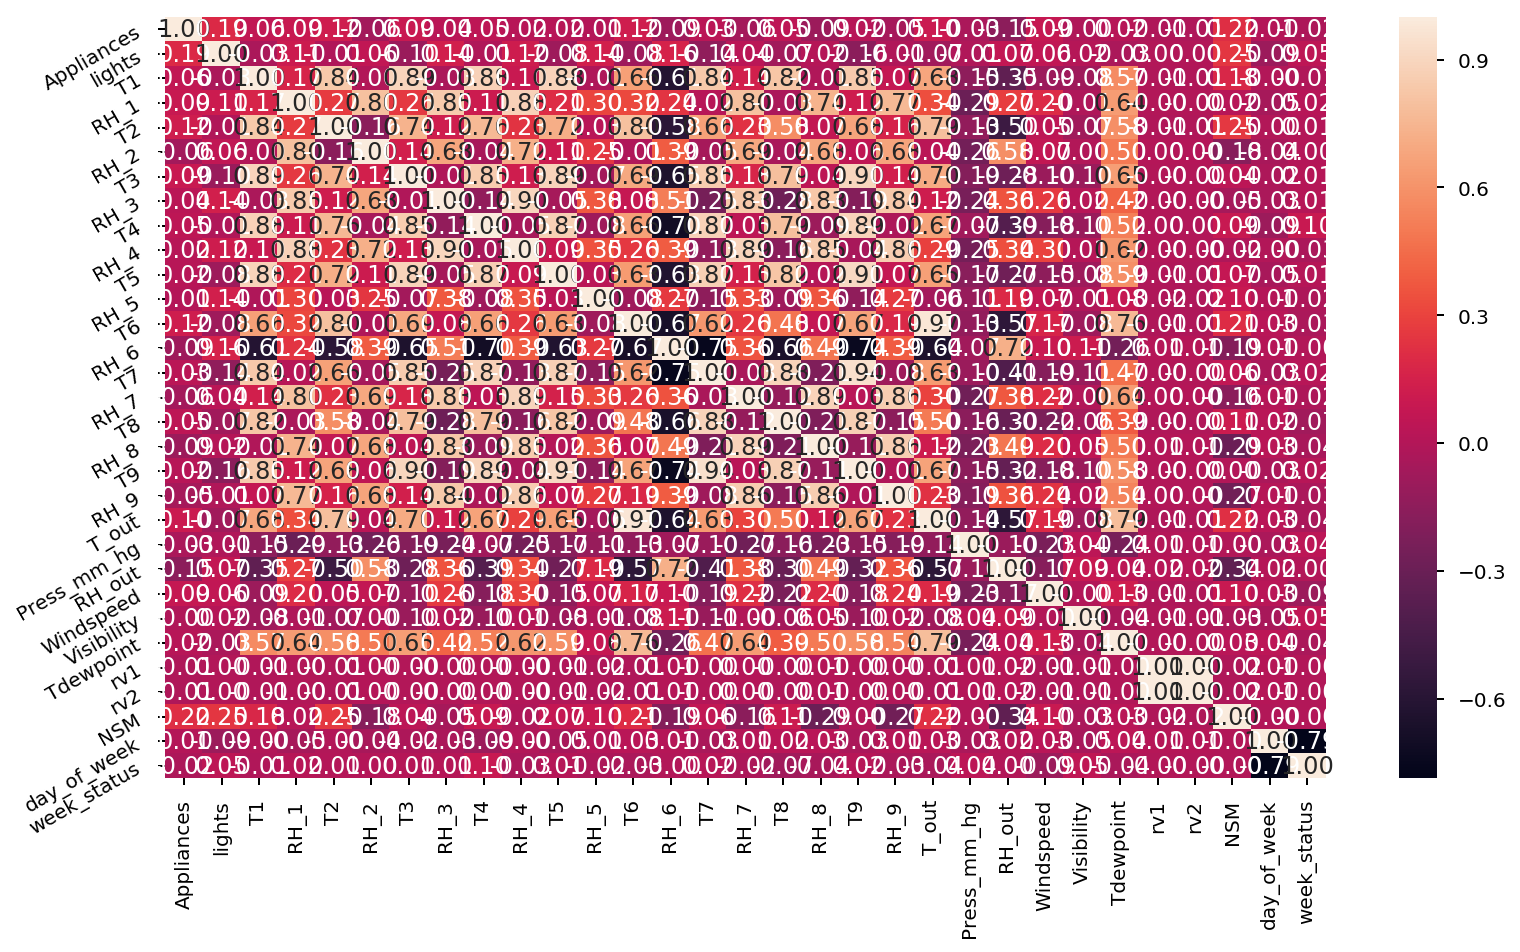

In [582]:
#Correlation and heat map
correlation = df.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
plt.figure(figsize=(13, 7))
a = sns.heatmap(correlation,annot = True, fmt = '.2f')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# Examine pair-wise Relationship

Creating new dataframe 

In [583]:
df_1 = df[['Appliances','T1','RH_1','T2','RH_2','T3','RH_3']]

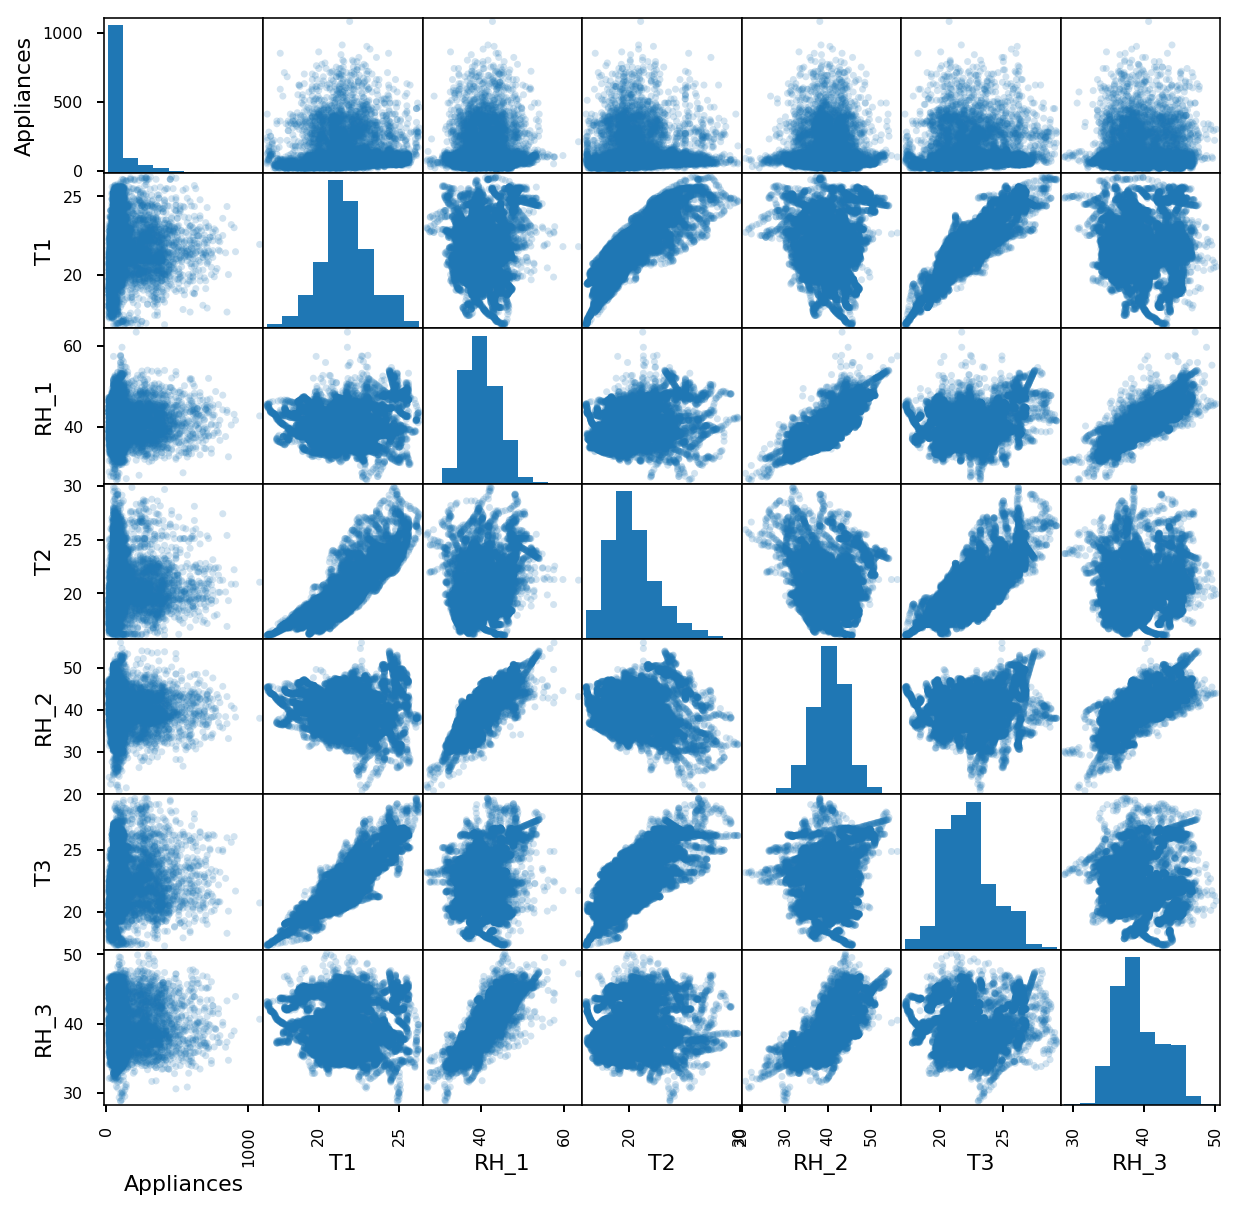

In [584]:
fig, ax= plt.subplots(figsize=(10 ,10))
scatter_matrix(df_1[['Appliances','T1','RH_1','T2','RH_2','T3','RH_3']],alpha=0.2,diagonal='hist',ax=ax);

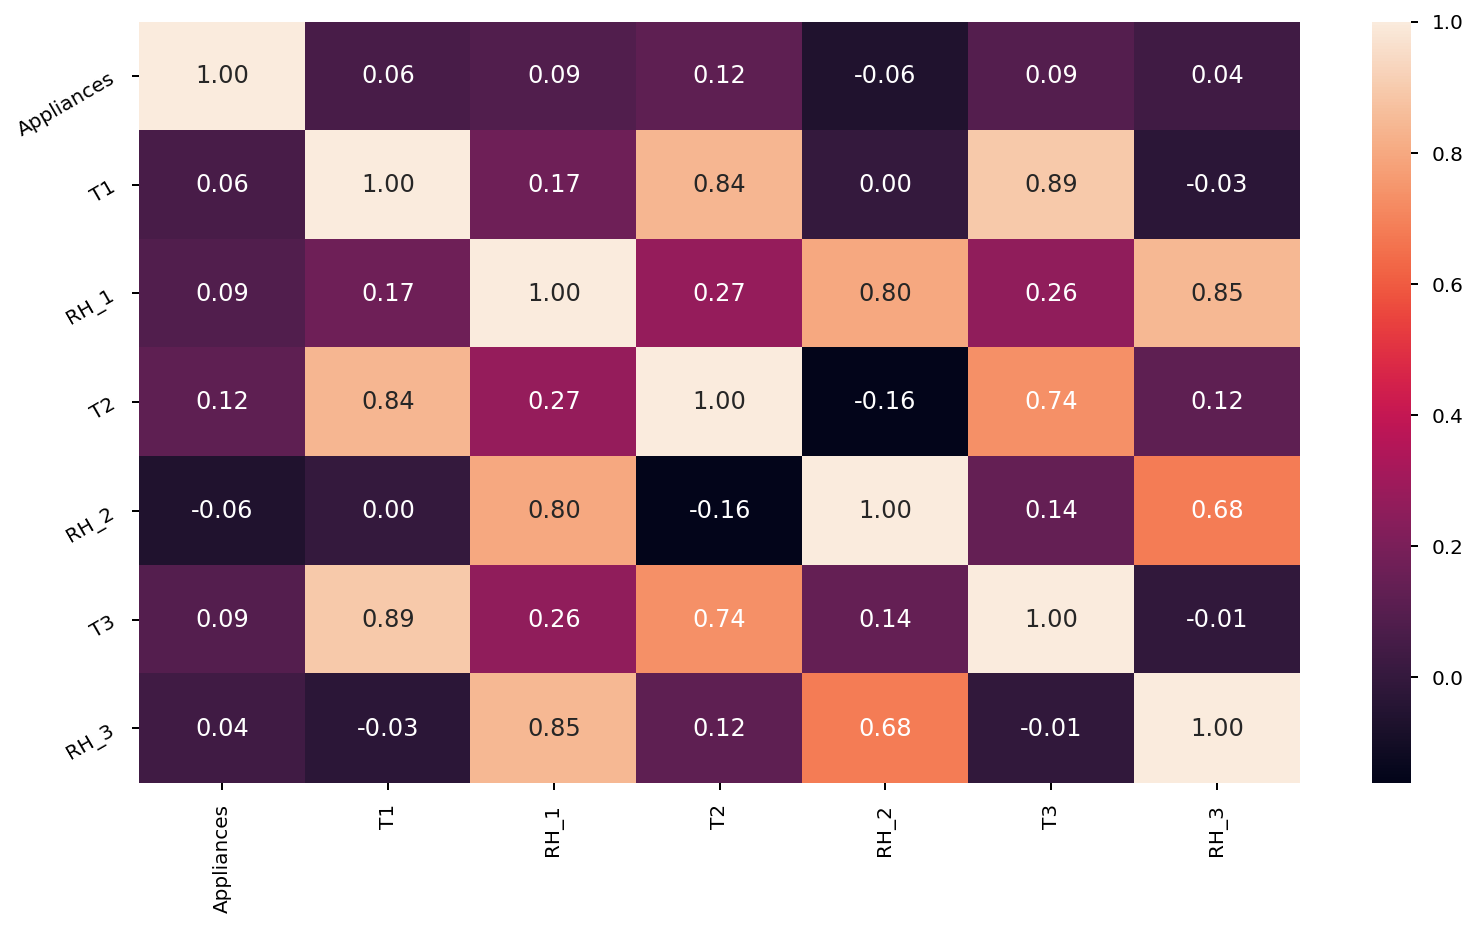

In [585]:
#Correlation and heat map
correlation = df_1.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
plt.figure(figsize=(13, 7))
a = sns.heatmap(correlation,annot = True, fmt = '.2f')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [586]:
df_2 = df[['Appliances','T4','RH_4','T5','RH_5','T6','RH_6']]

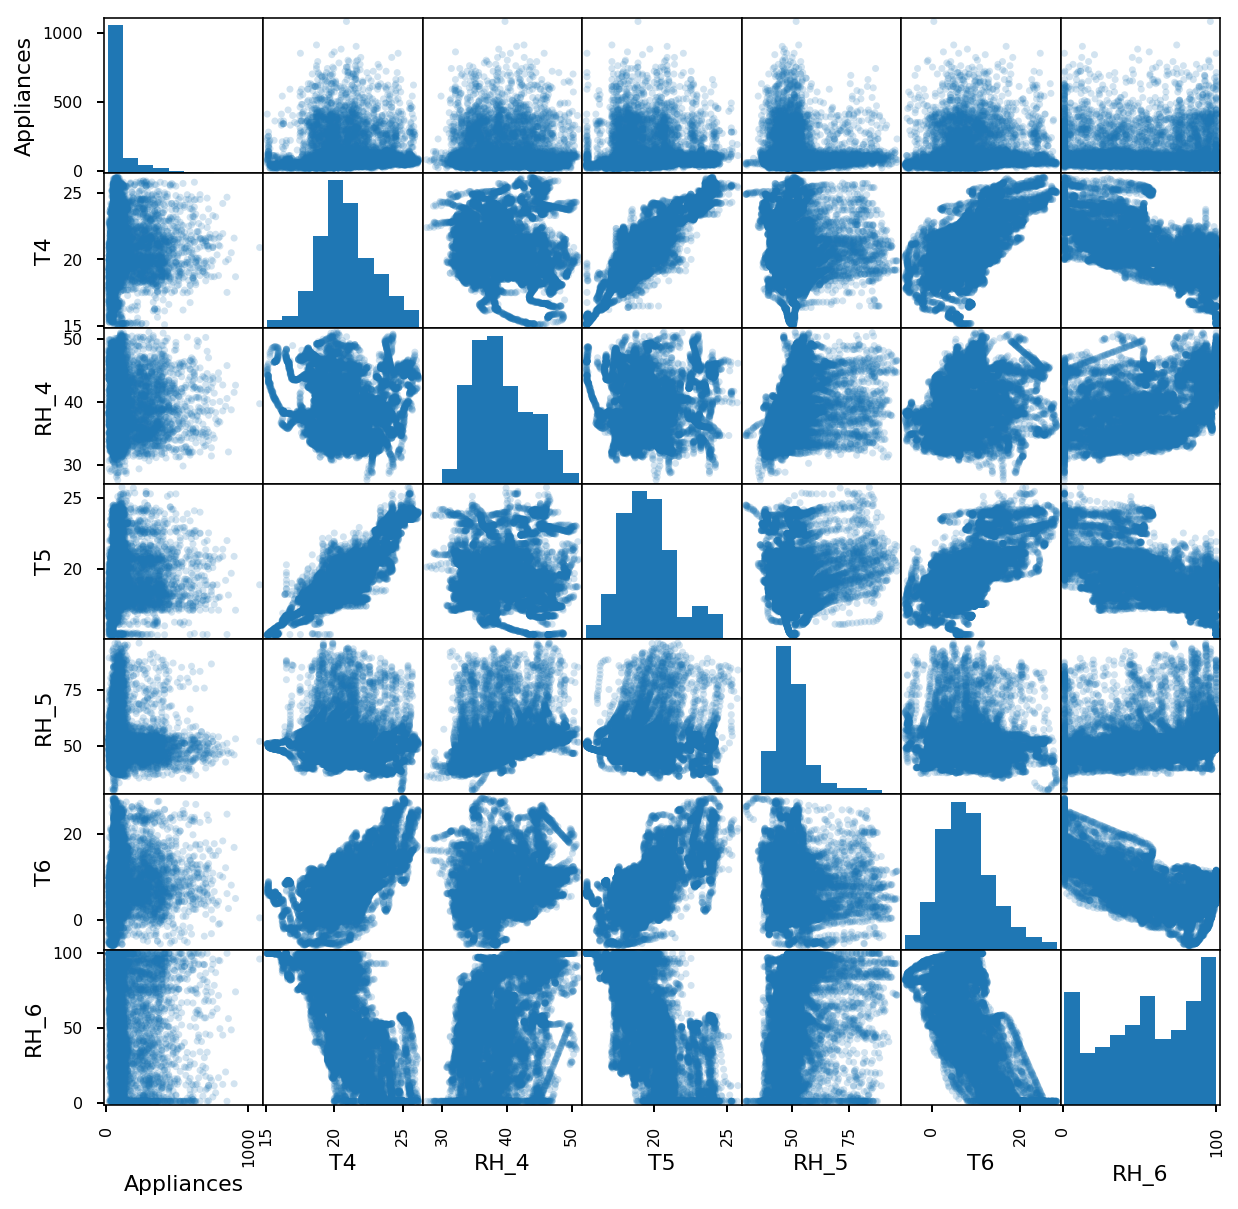

In [587]:
fig, ax= plt.subplots(figsize=(10 ,10))
scatter_matrix(df_2[['Appliances','T4','RH_4','T5','RH_5','T6','RH_6']],alpha=0.2,diagonal='hist',ax=ax);

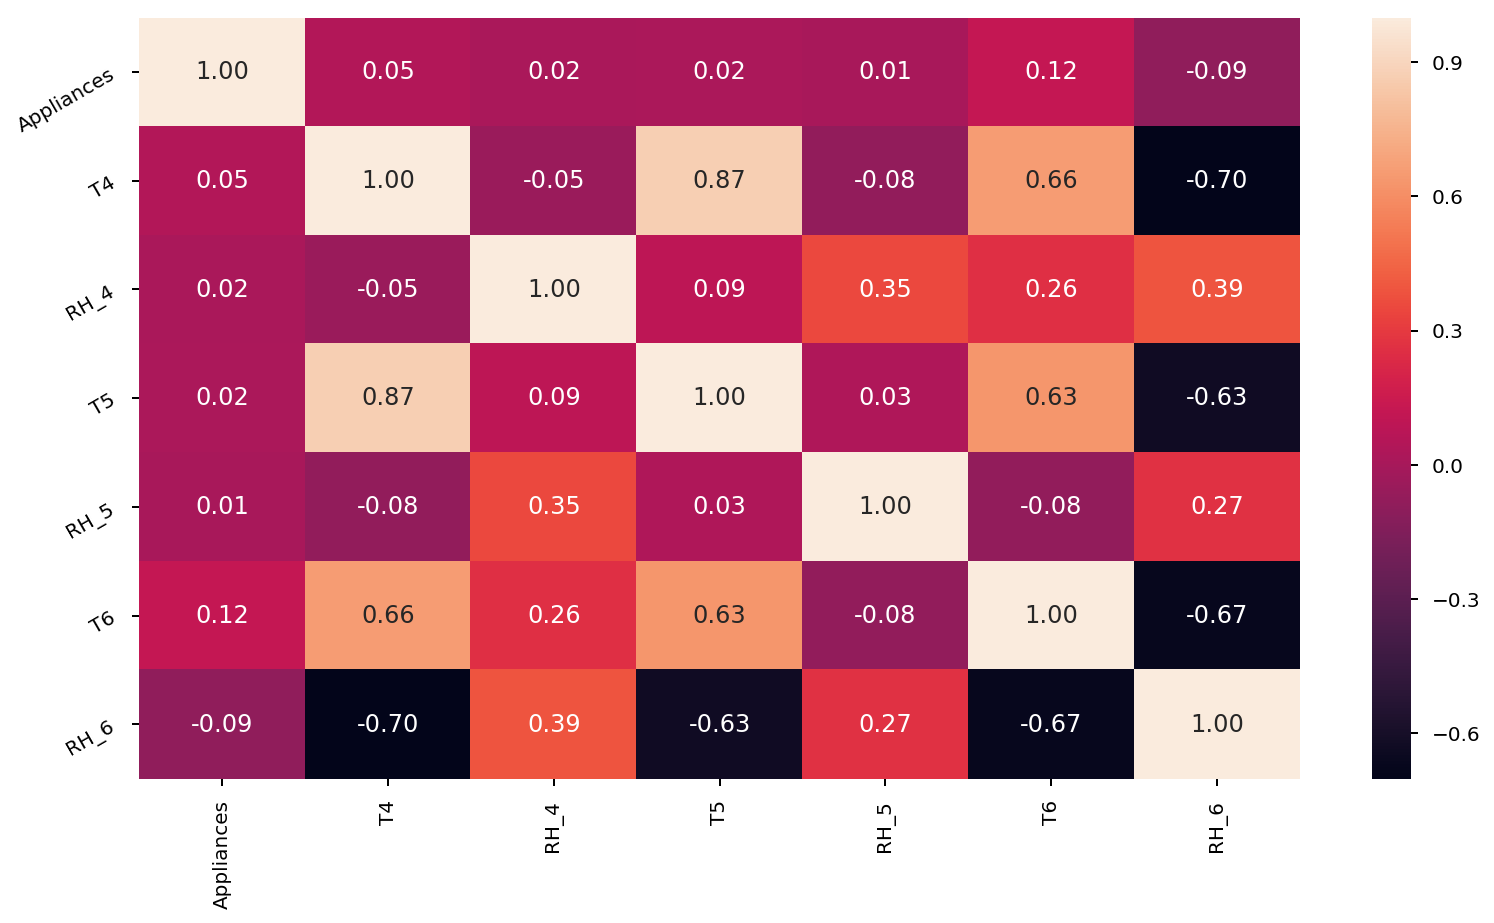

In [588]:
#Correlation and heat map
correlation = df_2.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
plt.figure(figsize=(13, 7))
a = sns.heatmap(correlation,annot = True, fmt = '.2f')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [589]:
df_3=df[['Appliances','T7','RH_7','T8','RH_8','T9','RH_9']]

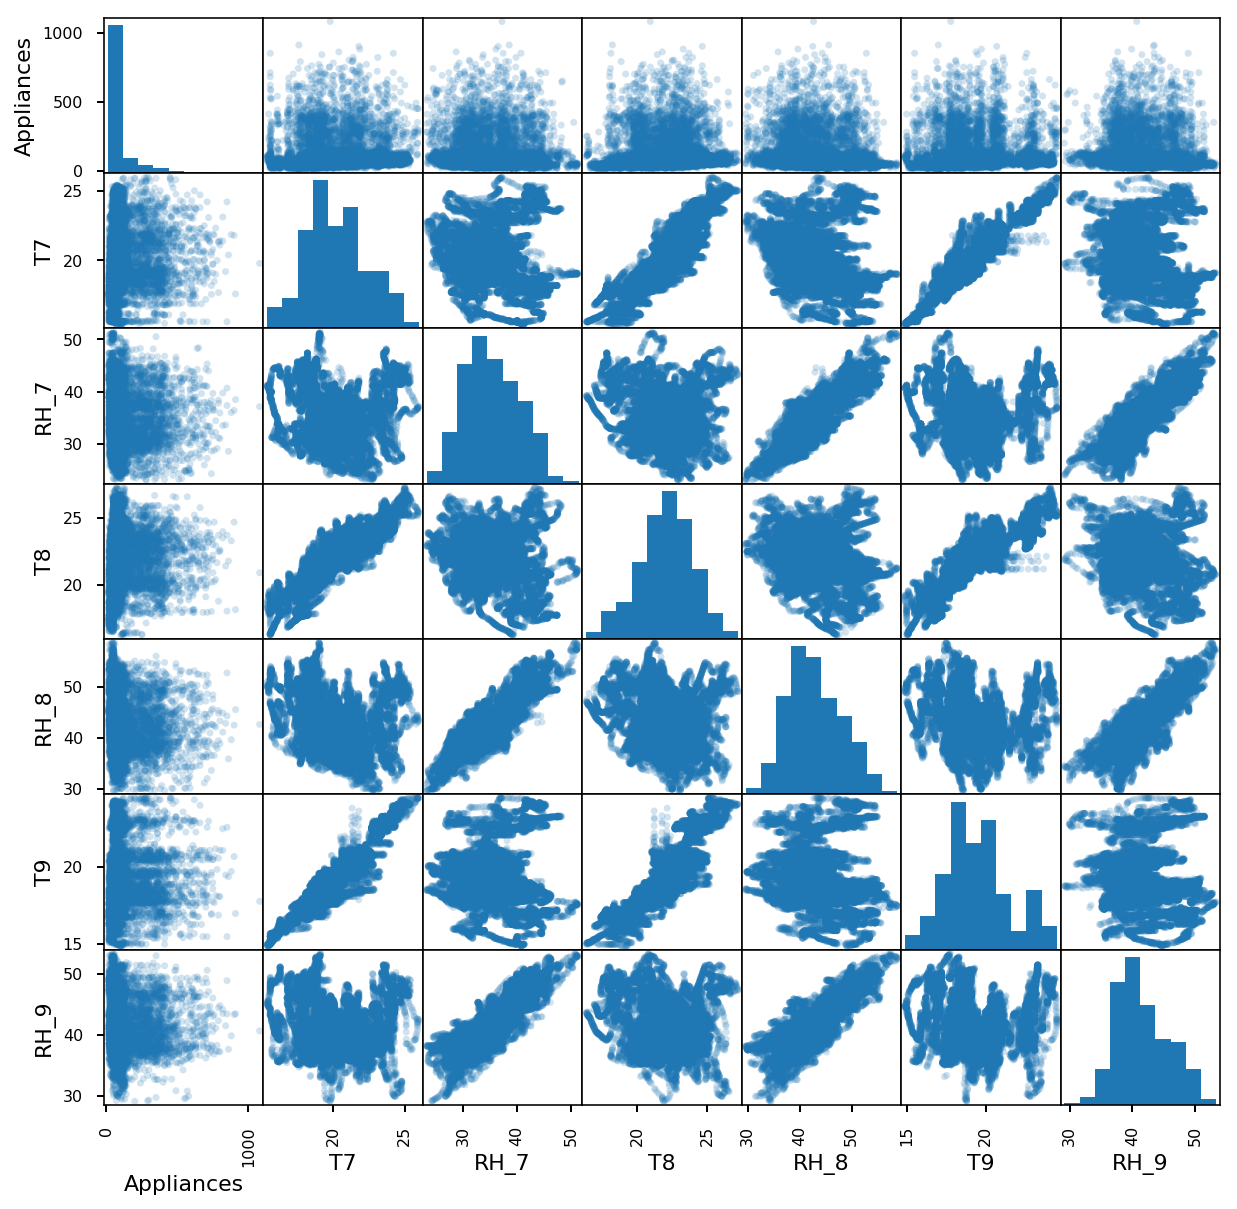

In [590]:
fig, ax= plt.subplots(figsize=(10 ,10))
scatter_matrix(df_3[['Appliances','T7','RH_7','T8','RH_8','T9','RH_9']],alpha=0.2,diagonal='hist',ax=ax);

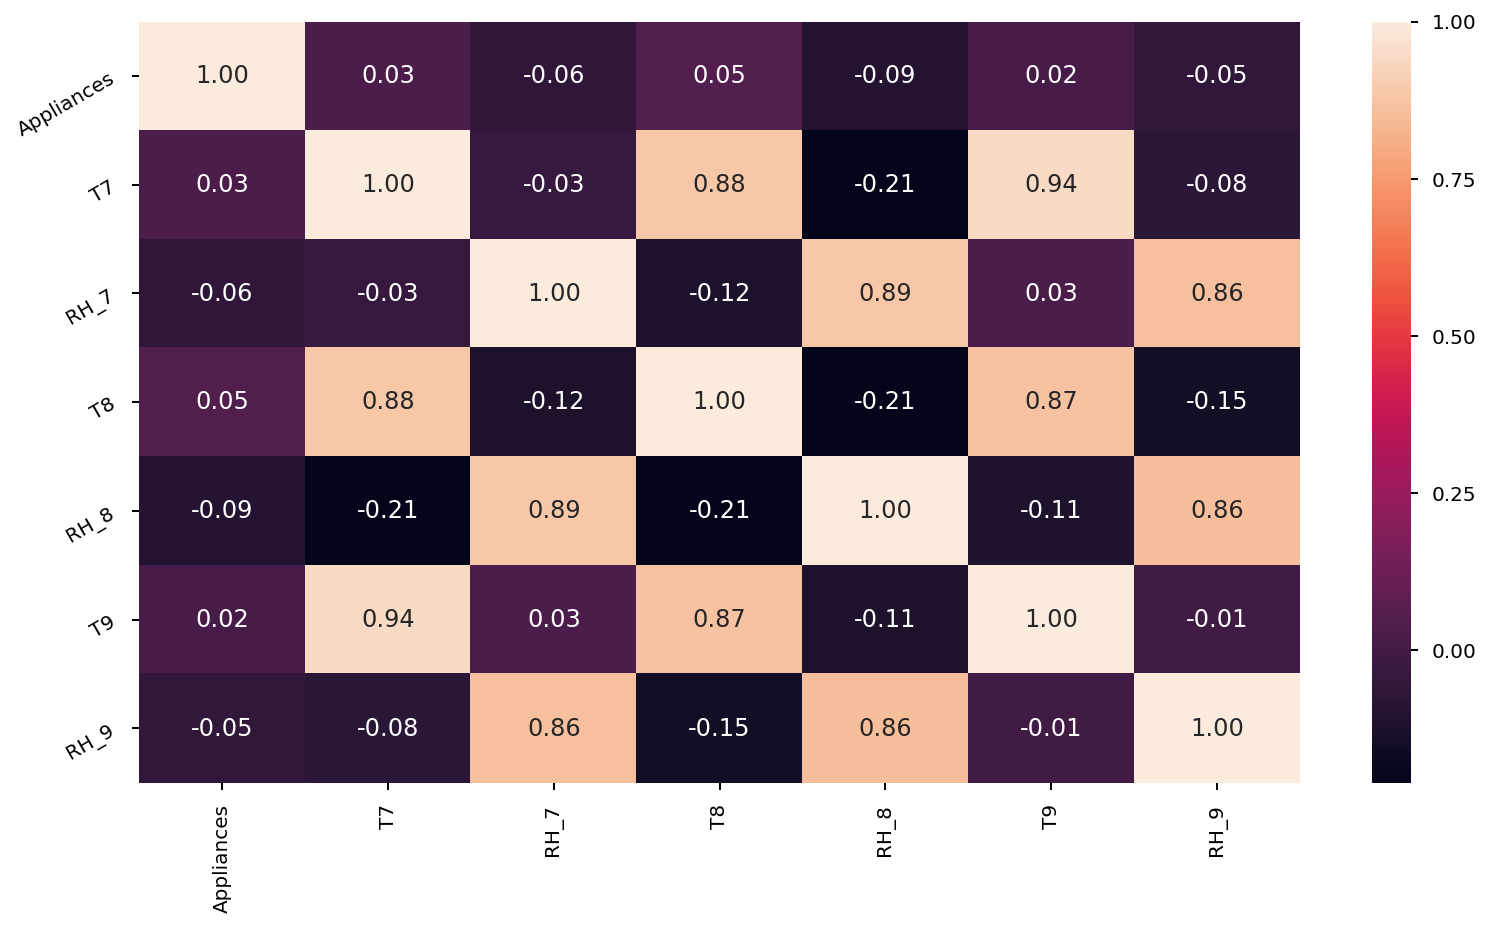

In [591]:
#Correlation and heat map
correlation = df_3.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
plt.figure(figsize=(13, 7))
a = sns.heatmap(correlation,annot = True, fmt = '.2f')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [592]:
df_4 = df[['Appliances','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']]

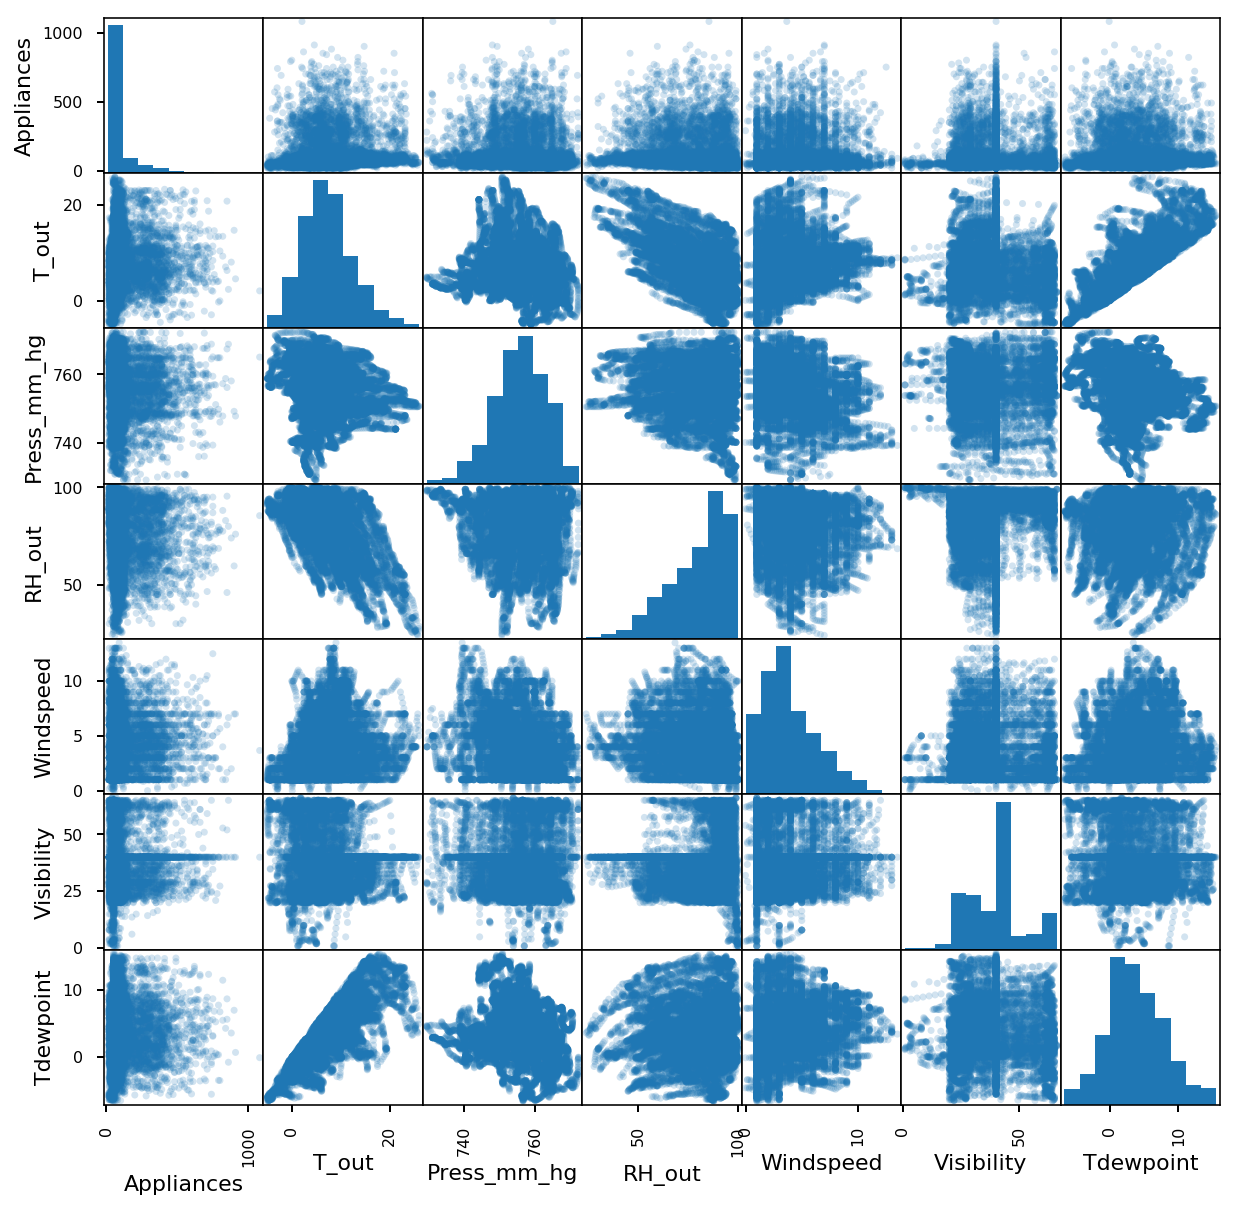

In [593]:
fig, ax= plt.subplots(figsize=(10 ,10))
scatter_matrix(df_4[['Appliances','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']],alpha=0.2,diagonal='hist',ax=ax);

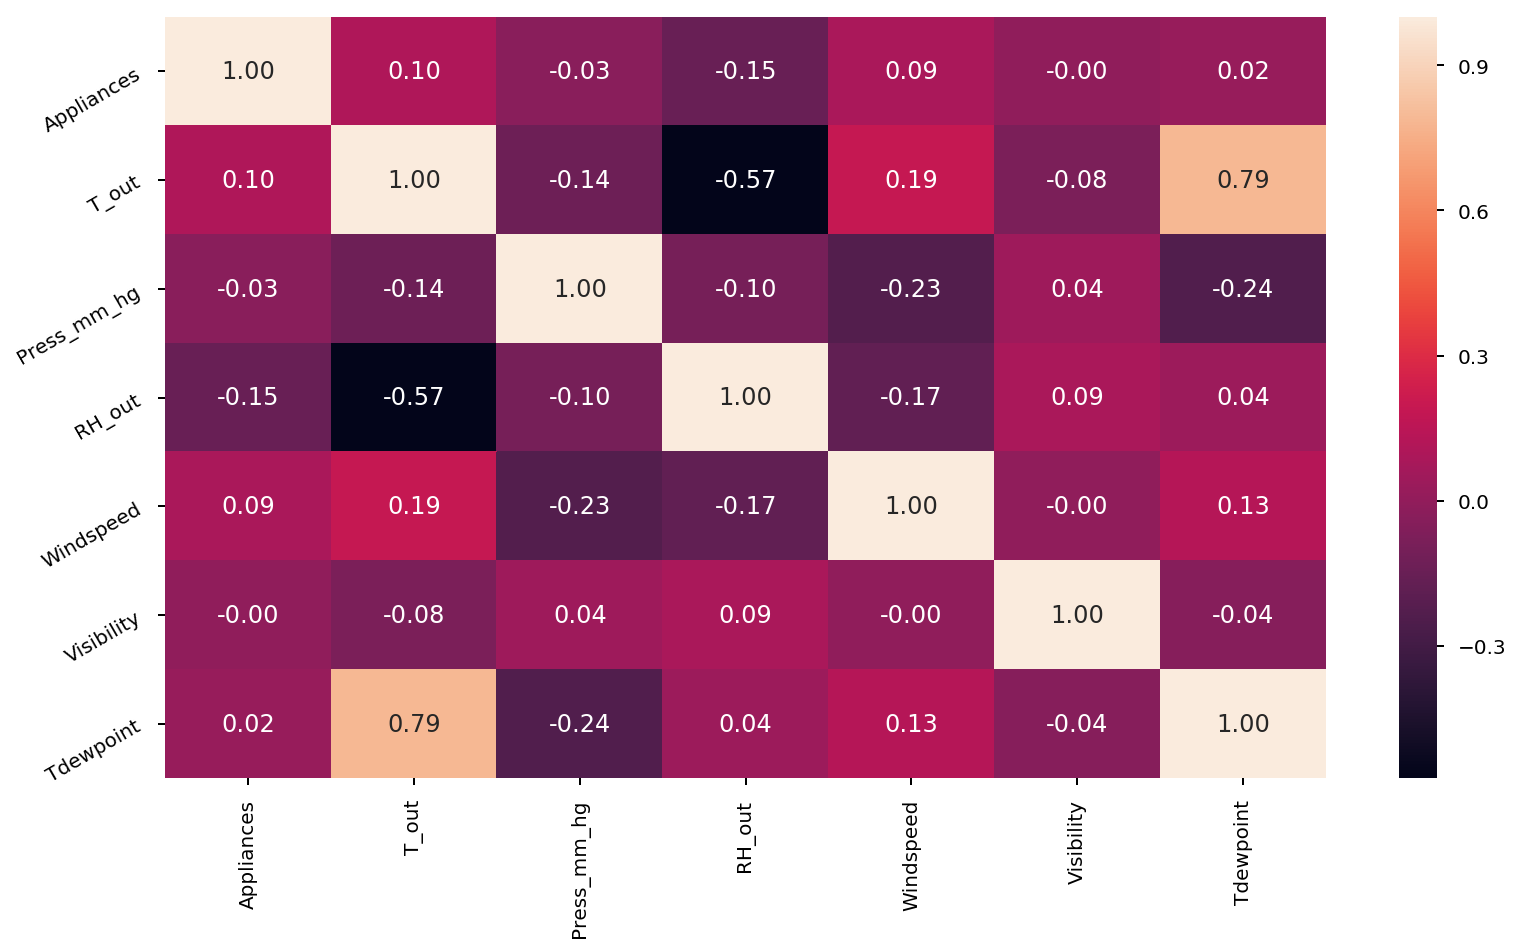

In [594]:
#Correlation and heat map
correlation = df_4.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
plt.figure(figsize=(13, 7))
a = sns.heatmap(correlation,annot = True, fmt = '.2f')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

## Examine relationship between Consumption and day of the week

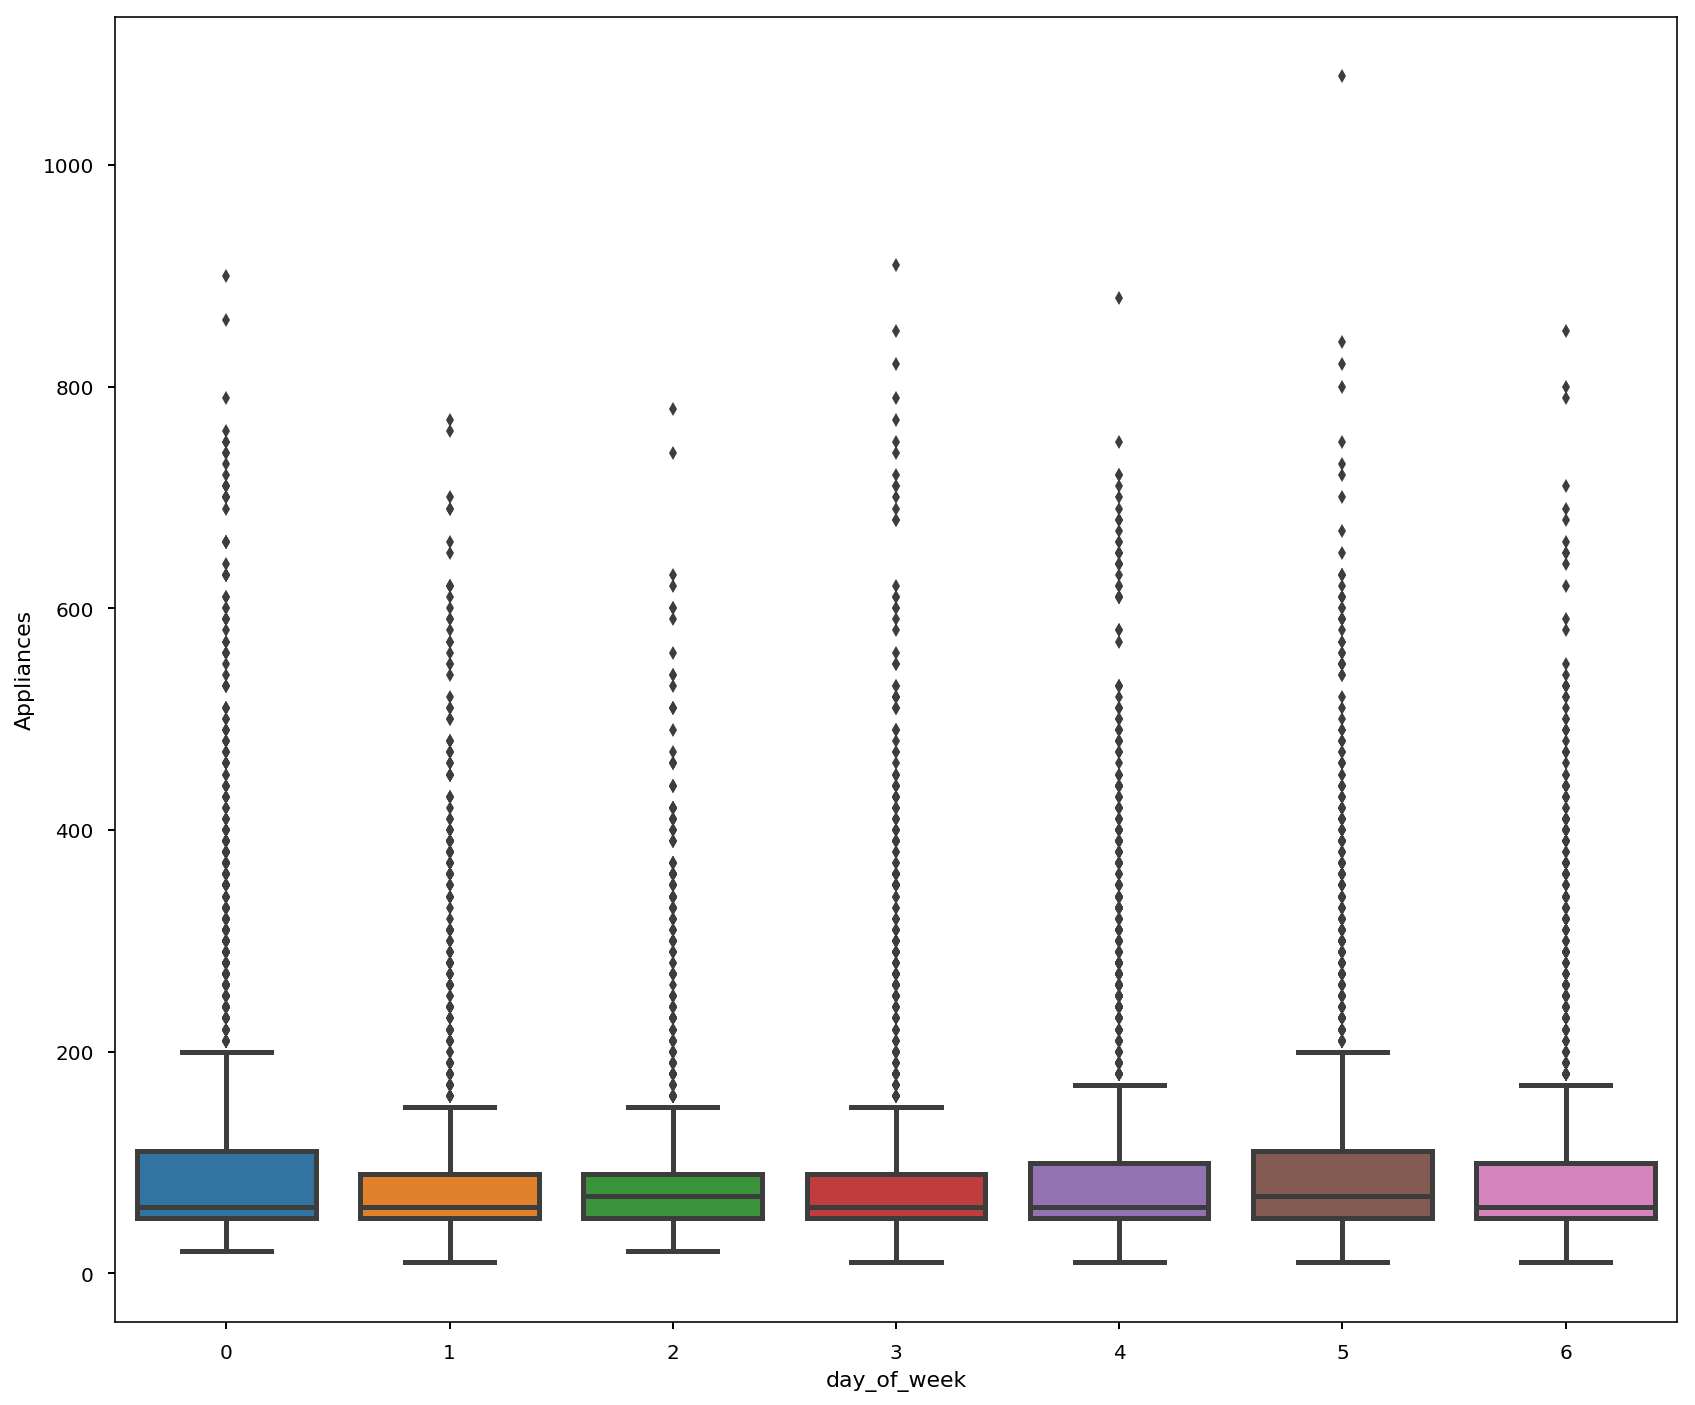

In [595]:
plt.figure(figsize=(14,12))
sns.boxplot(x='day_of_week', y='Appliances', data=df);

## Plotting Boxplots to observe the dispersion of the data and to check for outliers

{'boxes': [<matplotlib.lines.Line2D at 0x25a4c677f28>],
 'caps': [<matplotlib.lines.Line2D at 0x25a4c693a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a4e73f7f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a4e73f390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a4c6930f0>,
  <matplotlib.lines.Line2D at 0x25a4c693630>]}

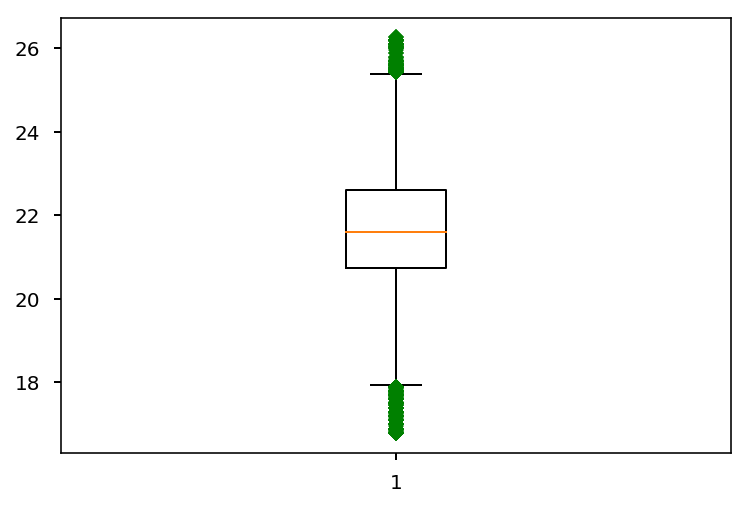

In [596]:
plt.figure()
plt.boxplot(df['T1'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a4dccae10>],
 'caps': [<matplotlib.lines.Line2D at 0x25a4dcce978>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a4dcefbe0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a4dcef128>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a4dccaf98>,
  <matplotlib.lines.Line2D at 0x25a4dcce518>]}

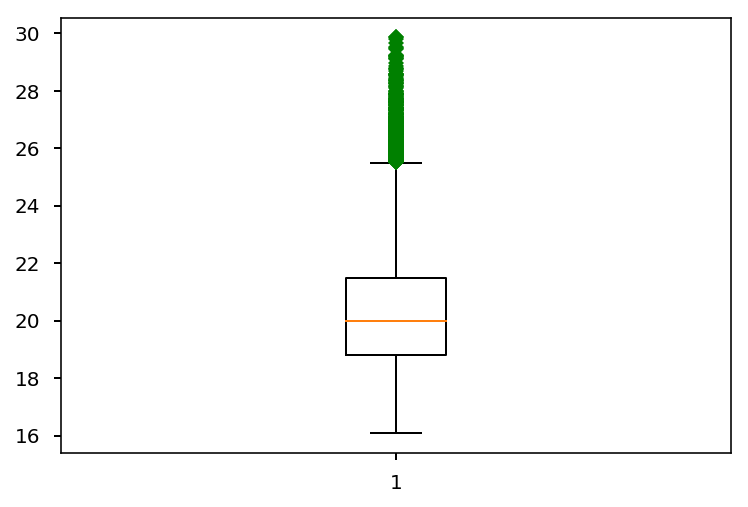

In [597]:
plt.figure()
plt.boxplot(df['T2'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a4cbb3b00>],
 'caps': [<matplotlib.lines.Line2D at 0x25a4cba5668>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a4cba43c8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a4cba5f28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a4cbb3c88>,
  <matplotlib.lines.Line2D at 0x25a4cba5208>]}

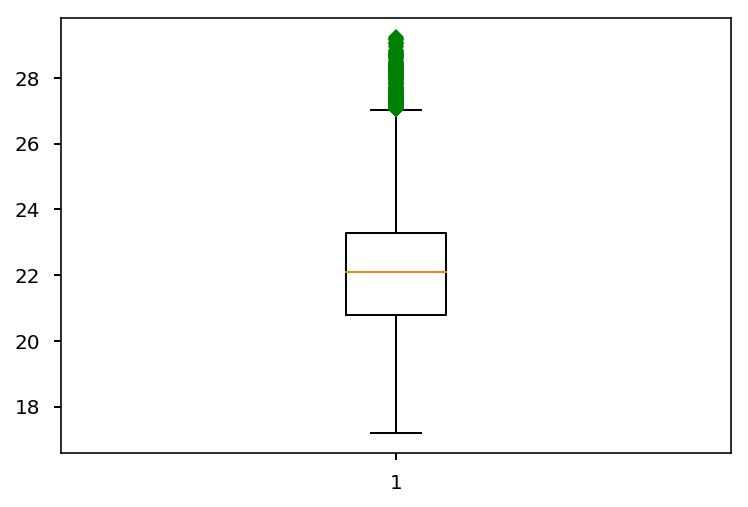

In [598]:
plt.figure()
plt.boxplot(df['T3'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a4c8d53c8>],
 'caps': [<matplotlib.lines.Line2D at 0x25a4c8baa90>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a4c8b37f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a4c8b3390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a4c8ba0f0>,
  <matplotlib.lines.Line2D at 0x25a4c8ba630>]}

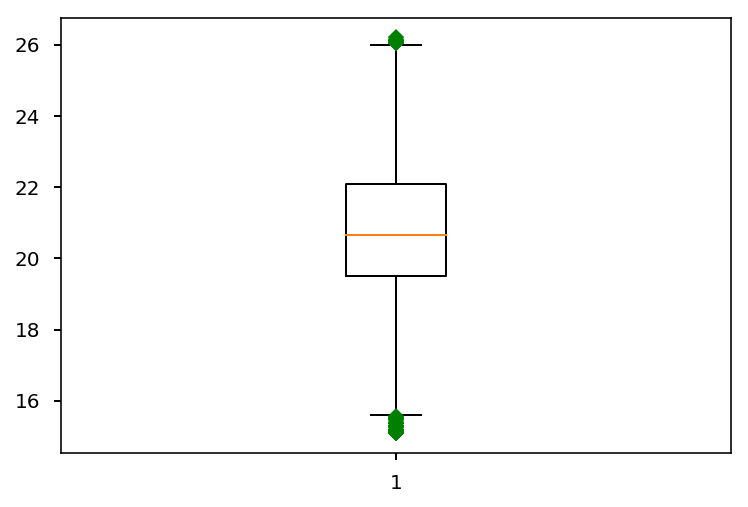

In [599]:
plt.figure()
plt.boxplot(df['T4'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a521d8278>],
 'caps': [<matplotlib.lines.Line2D at 0x25a521d8da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a521e6b00>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a521e66a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a521d8400>,
  <matplotlib.lines.Line2D at 0x25a521d8940>]}

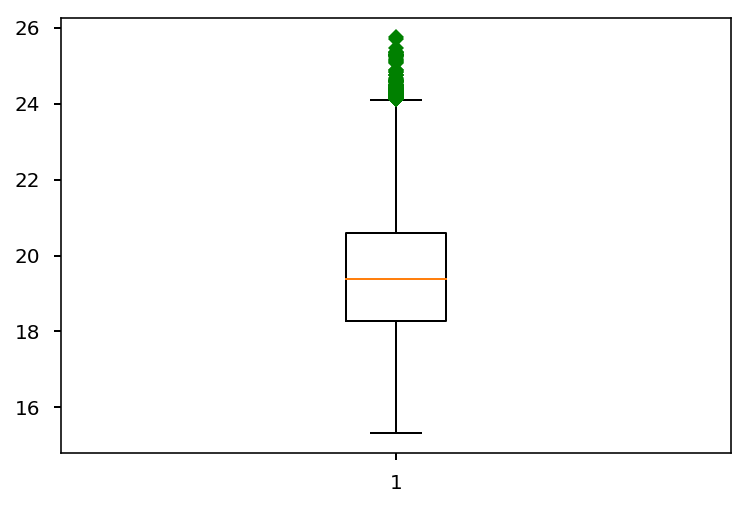

In [600]:
plt.figure()
plt.boxplot(df['T5'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a5a50b550>],
 'caps': [<matplotlib.lines.Line2D at 0x25a5a52a0b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a5a52add8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a5a52a978>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a5a50b6d8>,
  <matplotlib.lines.Line2D at 0x25a5a50bc18>]}

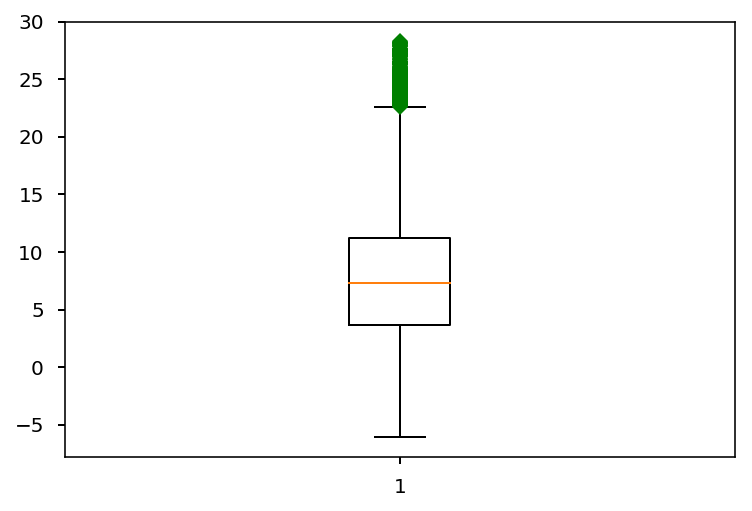

In [601]:
plt.figure()
plt.boxplot(df['T6'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a5446eeb8>],
 'caps': [<matplotlib.lines.Line2D at 0x25a5446e128>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a54450a20>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a544505c0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a5446efd0>,
  <matplotlib.lines.Line2D at 0x25a5446eba8>]}

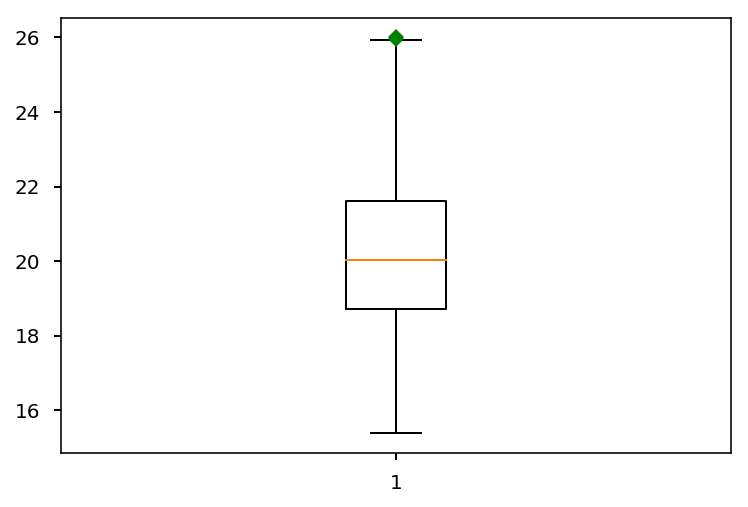

In [602]:
plt.figure()
plt.boxplot(df['T7'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a541c1550>],
 'caps': [<matplotlib.lines.Line2D at 0x25a541e10b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a541e1dd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a541e1978>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a541c16d8>,
  <matplotlib.lines.Line2D at 0x25a541c1c18>]}

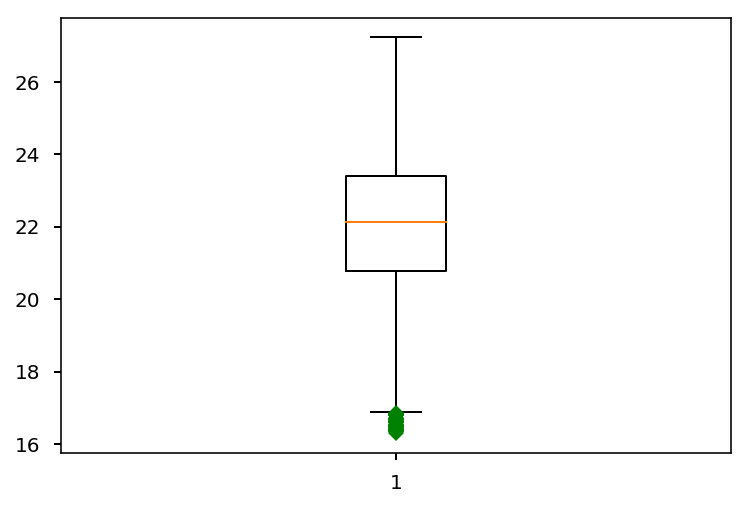

In [603]:
plt.figure()
plt.boxplot(df['T8'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a5437a898>],
 'caps': [<matplotlib.lines.Line2D at 0x25a5436c400>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a54377160>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a5436ccc0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a5437aa20>,
  <matplotlib.lines.Line2D at 0x25a5437af60>]}

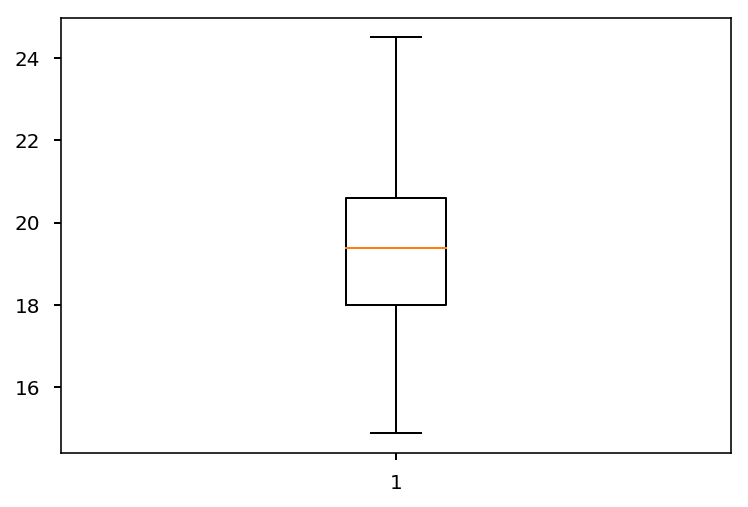

In [604]:
plt.figure()
plt.boxplot(df['T9'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a565d5d68>],
 'caps': [<matplotlib.lines.Line2D at 0x25a565c72b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a565c7fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a565c7b70>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a565d55c0>,
  <matplotlib.lines.Line2D at 0x25a565d5048>]}

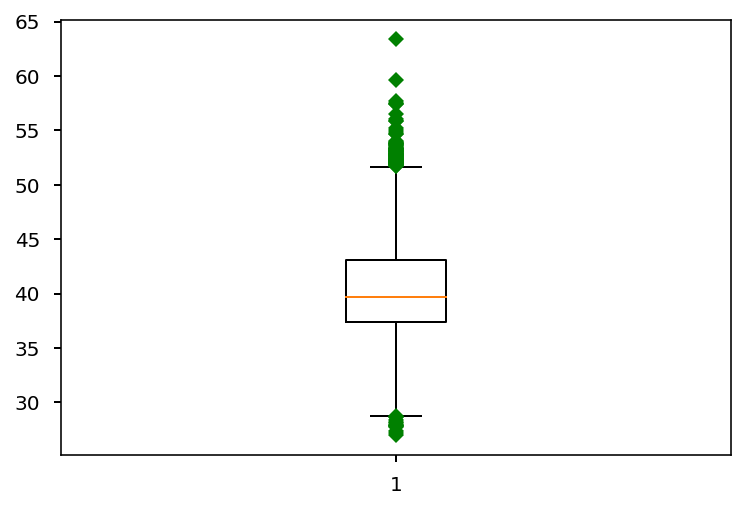

In [605]:
plt.figure()
plt.boxplot(df['RH_1'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a566019e8>],
 'caps': [<matplotlib.lines.Line2D at 0x25a566014e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a565eecc0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a565ee860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a566016d8>,
  <matplotlib.lines.Line2D at 0x25a566016a0>]}

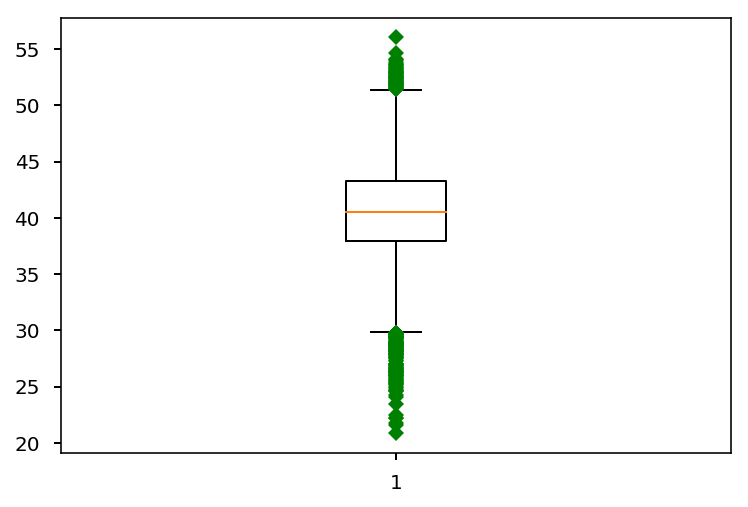

In [606]:
plt.figure()
plt.boxplot(df['RH_2'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a4e0c11d0>],
 'caps': [<matplotlib.lines.Line2D at 0x25a4e0c1cf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a57503908>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a57503f60>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a4e0c1358>,
  <matplotlib.lines.Line2D at 0x25a4e0c1898>]}

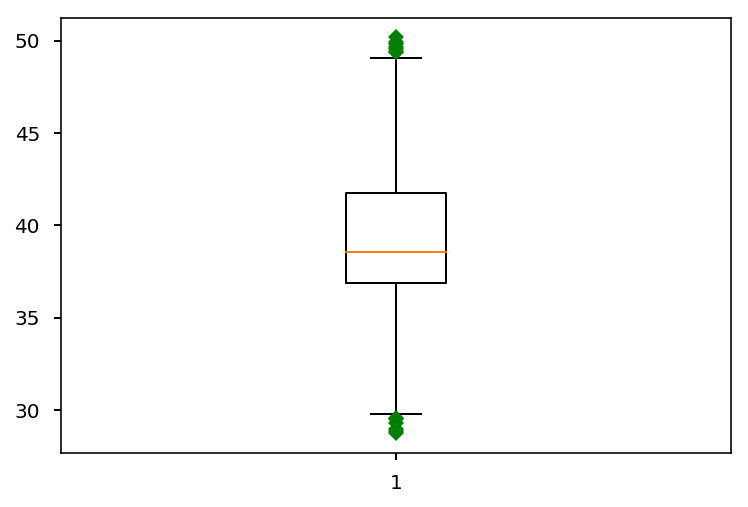

In [607]:
plt.figure()
plt.boxplot(df['RH_3'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a562b40b8>],
 'caps': [<matplotlib.lines.Line2D at 0x25a562b4be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a562ba940>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a562ba4e0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a562b4240>,
  <matplotlib.lines.Line2D at 0x25a562b4780>]}

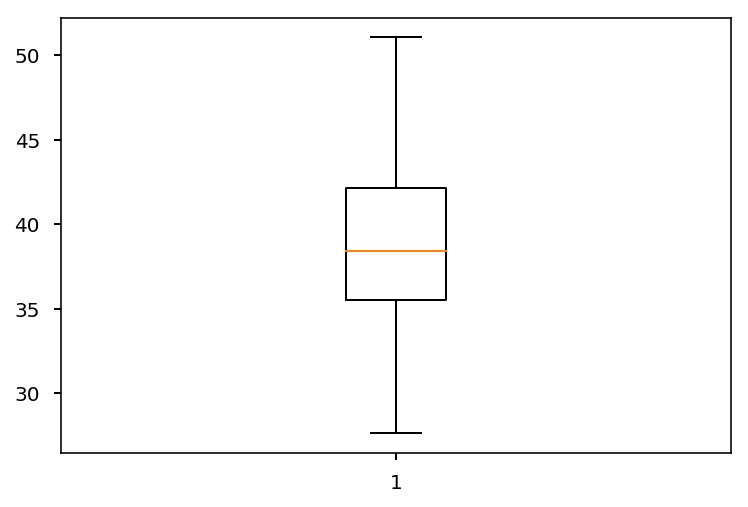

In [608]:
plt.figure()
plt.boxplot(df['RH_4'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a59d4de48>],
 'caps': [<matplotlib.lines.Line2D at 0x25a59d469b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a59d4e710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a59d4e2b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a59d4dfd0>,
  <matplotlib.lines.Line2D at 0x25a59d46550>]}

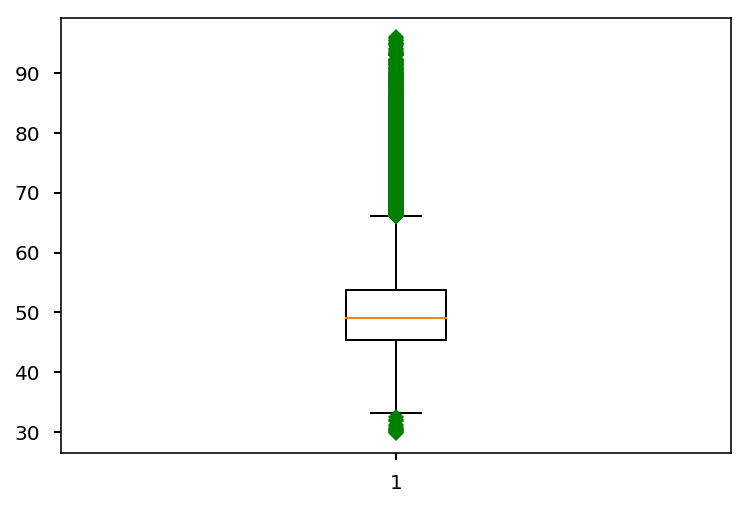

In [609]:
plt.figure()
plt.boxplot(df['RH_5'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a5806c6d8>],
 'caps': [<matplotlib.lines.Line2D at 0x25a580c2240>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a580c2f60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a580c2b00>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a5806c860>,
  <matplotlib.lines.Line2D at 0x25a5806cda0>]}

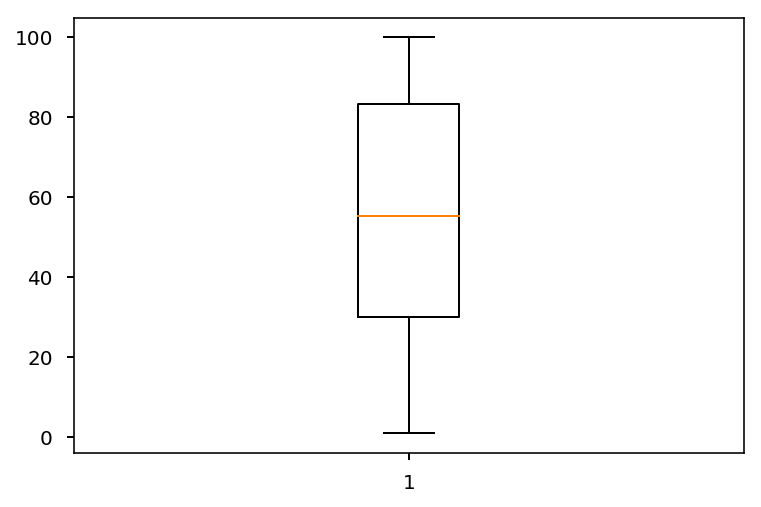

In [610]:
plt.figure()
plt.boxplot(df['RH_6'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a5808ba20>],
 'caps': [<matplotlib.lines.Line2D at 0x25a580be7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a580b02e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a580be860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a5808bba8>,
  <matplotlib.lines.Line2D at 0x25a580be9e8>]}

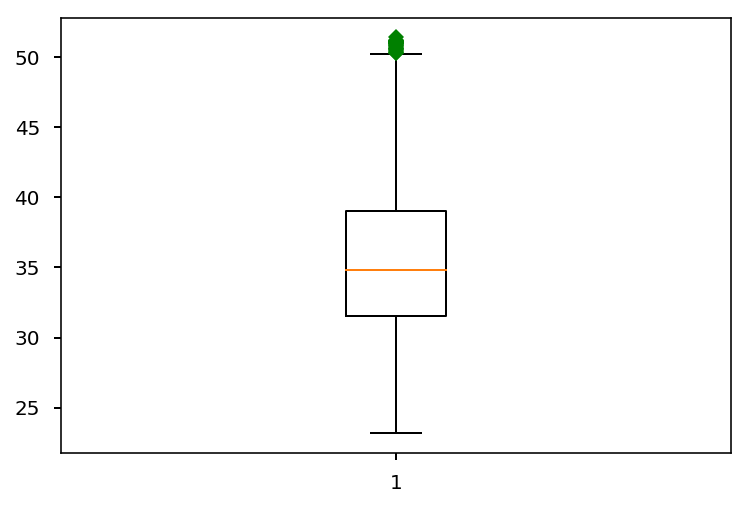

In [611]:
plt.figure()
plt.boxplot(df['RH_7'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a5764e630>],
 'caps': [<matplotlib.lines.Line2D at 0x25a57643828>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a5764a588>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a5764a128>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a5764ef60>,
  <matplotlib.lines.Line2D at 0x25a576433c8>]}

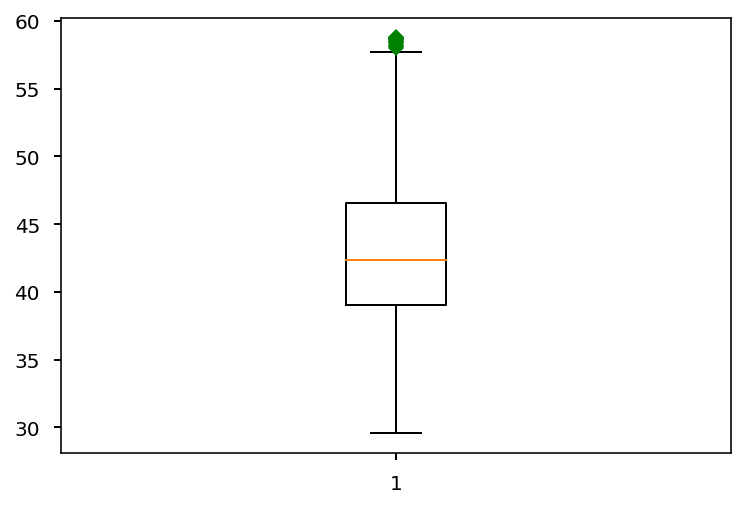

In [612]:
plt.figure()
plt.boxplot(df['RH_8'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a59d3d518>],
 'caps': [<matplotlib.lines.Line2D at 0x25a5770d470>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a5770df98>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a5770d940>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a59d3d6a0>,
  <matplotlib.lines.Line2D at 0x25a59d3dbe0>]}

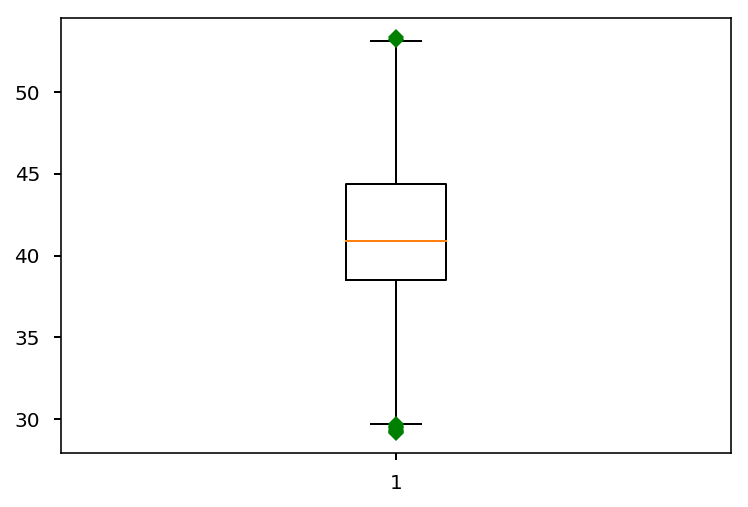

In [613]:
plt.figure()
plt.boxplot(df['RH_9'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a543d8438>],
 'caps': [<matplotlib.lines.Line2D at 0x25a543d8f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a543c4cc0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a543c4860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a543d85c0>,
  <matplotlib.lines.Line2D at 0x25a543d8b00>]}

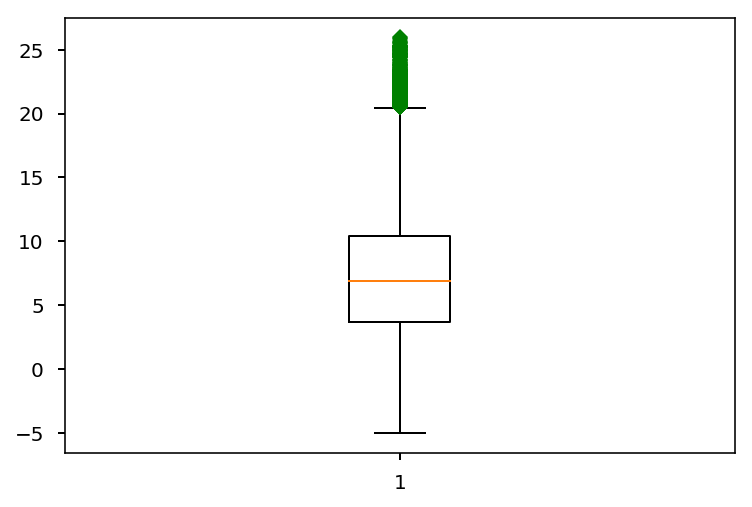

In [614]:
plt.figure()
plt.boxplot(df['T_out'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a57582ac8>],
 'caps': [<matplotlib.lines.Line2D at 0x25a57593630>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a5759d2b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a57593ef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a57582c50>,
  <matplotlib.lines.Line2D at 0x25a575931d0>]}

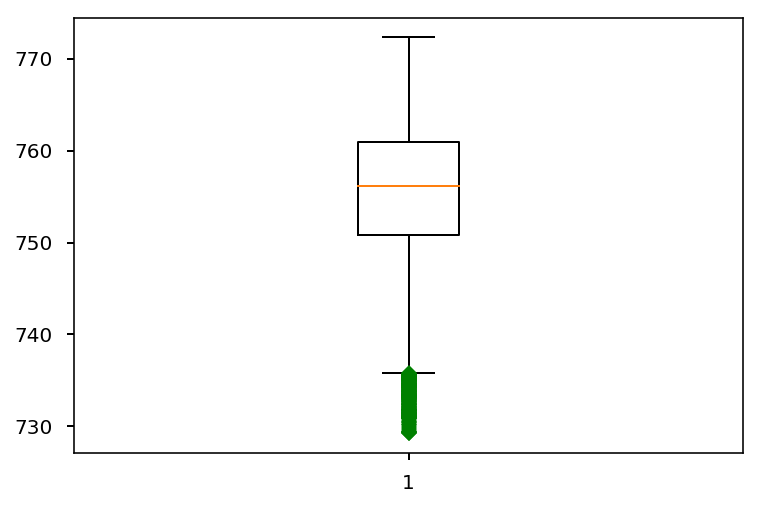

In [615]:
plt.figure()
plt.boxplot(df['Press_mm_hg'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a575e08d0>],
 'caps': [<matplotlib.lines.Line2D at 0x25a57611438>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a5760e198>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a57611cf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a575e0a58>,
  <matplotlib.lines.Line2D at 0x25a575e0f98>]}

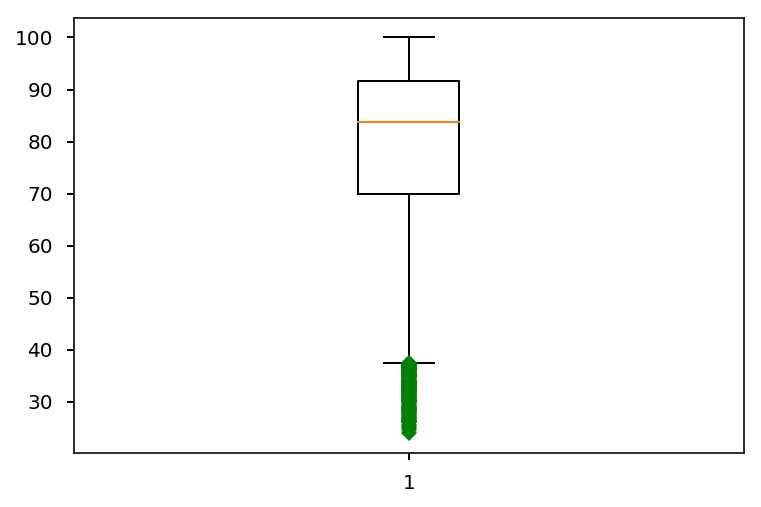

In [616]:
plt.figure()
plt.boxplot(df['RH_out'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a59d875f8>],
 'caps': [<matplotlib.lines.Line2D at 0x25a59da6160>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a59da6e80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a59da6a20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a59d87780>,
  <matplotlib.lines.Line2D at 0x25a59d87cc0>]}

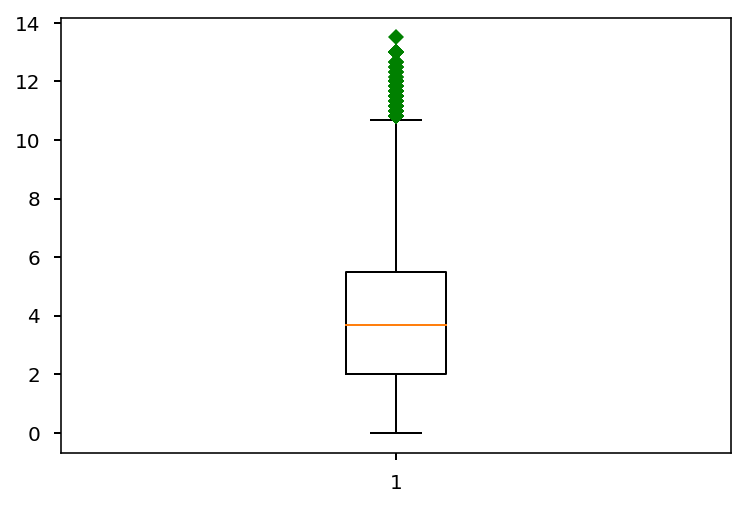

In [617]:
plt.figure()
plt.boxplot(df['Windspeed'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a54294198>],
 'caps': [<matplotlib.lines.Line2D at 0x25a54294cc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a57a0e438>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a57a0e278>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a54294320>,
  <matplotlib.lines.Line2D at 0x25a54294860>]}

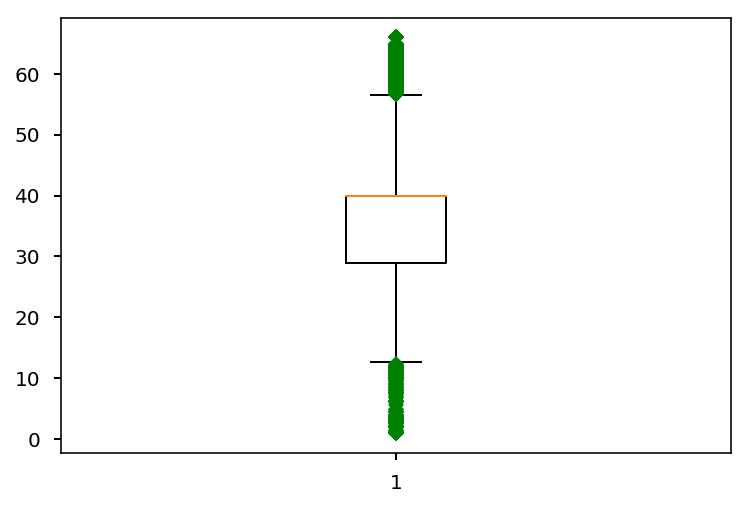

In [618]:
plt.figure()
plt.boxplot(df['Visibility'],0,'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x25a5776e978>],
 'caps': [<matplotlib.lines.Line2D at 0x25a577994e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x25a57768240>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25a57799da0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x25a5776eb00>,
  <matplotlib.lines.Line2D at 0x25a57799080>]}

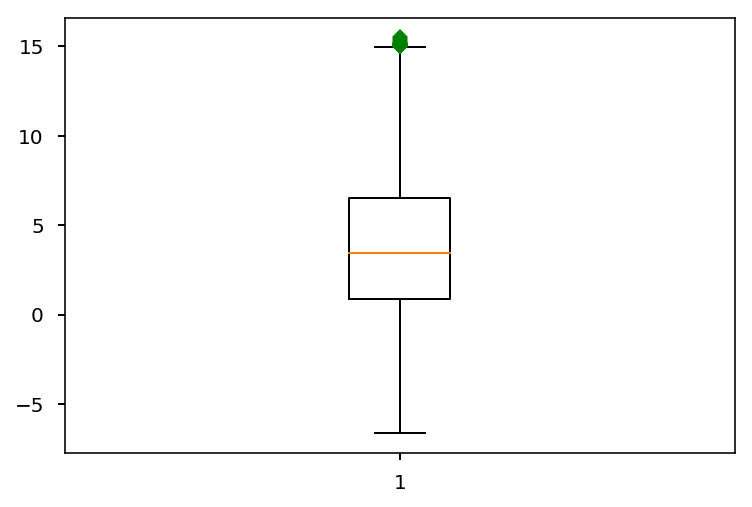

In [619]:
plt.figure()
plt.boxplot(df['Tdewpoint'],0,'gD')

From the above plots we concluded that the data is widely spread above the median which is clear indication of outliers

# Now Detecting outliers for each variable

To detect outliers in the dataset we will proceed with the following steps
>1. Arrange all the dataset points and calculate median
>2. Calculate the upper quartile
>3. Calculate the lower quartile
>> Since the above three aspects are given in the dataset
>4. Calculate the Interquartile Range
>> It is the product of difference of the upper quartile and lower quartile and numeric value of 1.5
>5. Calculate the inner fences for the dataset
>> It is set of numerical boundaries which is classified as major and minor outlier
>>>Major outlier = Upper Quartile + Interquartile rannge
>>>| Minor outlier = Lower Quartlie - Interquartile rannge

Table calculating outliers for each variable
<table>
    <thead class="valign-top">
        <tr>
            <th scope="col" class="rowsep-1 align-left">Variables</th>
            <th scope="col" class="rowsep-1 align-left">Upper Quartile</th>
            <th scope="col" class="rowsep-1 align-left">Lower Quartile</th>
            <th scope="col" class="rowsep-1 align-left">Interquartile Range</th>
            <th scope="col" class="rowsep-1 align-left">Major Outlier</th>
            <th scope="col" class="rowsep-1 align-left">Minor Outlier</th>
        </tr>
    </thead>
    <tbody>
        <tr>
        <th class="align-left" scope="row">T1</th>
            <td class="align-left">22.6</td>
            <td class="align-left">20.73</td>
            <td class="align-left">2.805</td>
            <td class="align-left">24.80</td>
            <td class="align-left">18.40</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_1</th>
            <td class="align-left">43.09</td>
            <td class="align-left">37.36</td>
            <td class="align-left">8.595</td>
            <td class="align-left">51.25</td>
            <td class="align-left">28.50</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T2</th>
            <td class="align-left">21.50</td>
            <td class="align-left">18.82</td>
            <td class="align-left">4.02</td>
            <td class="align-left">24.30</td>
            <td class="align-left">14.80</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_2</th>
            <td class="align-left">43.29</td>
            <td class="align-left">37.90</td>
            <td class="align-left">8.08</td>
            <td class="align-left">50.50</td>
            <td class="align-left">32</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T3</th>
            <td class="align-left">23.29</td>
            <td class="align-left">20.79</td>
            <td class="align-left">3.75</td>
            <td class="align-left">26.20</td>
            <td class="align-left">17.04</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_3</th>
            <td class="align-left">41.76</td>
            <td class="align-left">36.90</td>
            <td class="align-left">7.29</td>
            <td class="align-left">46.50</td>
            <td class="align-left">30</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T4</th>
            <td class="align-left">22.10</td>
            <td class="align-left">19.50</td>
            <td class="align-left">3.90</td>
            <td class="align-left">24.50</td>
            <td class="align-left">16.50</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_4</th>
            <td class="align-left">42.13</td>
            <td class="align-left">35.53</td>
            <td class="align-left">9.90</td>
            <td class="align-left">49</td>
            <td class="align-left">25.60</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T5</th>
            <td class="align-left">20.60</td>
            <td class="align-left">18.26</td>
            <td class="align-left">3.51</td>
            <td class="align-left">22.80</td>
            <td class="align-left">14.75</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_5</th>
            <td class="align-left">53.66</td>
            <td class="align-left">45.40</td>
            <td class="align-left">12.39</td>
            <td class="align-left">62.80</td>
            <td class="align-left">34</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T6</th>
            <td class="align-left">11.24</td>
            <td class="align-left">3.65</td>
            <td class="align-left">11.38</td>
            <td class="align-left">18</td>
            <td class="align-left">-7.73</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_6</th>
            <td class="align-left">83.32</td>
            <td class="align-left">30.09</td>
            <td class="align-left">79.84</td>
            <td class="align-left">163.16</td>
            <td class="align-left">-49.75</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T7</th>
            <td class="align-left">21.60</td>
            <td class="align-left">18.70</td>
            <td class="align-left">4.35</td>
            <td class="align-left">25.90</td>
            <td class="align-left">14.35</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_7</th>
            <td class="align-left">39</td>
            <td class="align-left">31.50</td>
            <td class="align-left">11.25</td>
            <td class="align-left">47</td>
            <td class="align-left">20.25</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T8</th>
            <td class="align-left">23.39</td>
            <td class="align-left">20.79</td>
            <td class="align-left">3.90</td>
            <td class="align-left">27.29</td>
            <td class="align-left">17.20</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_8</th>
            <td class="align-left">46.56</td>
            <td class="align-left">39.06</td>
            <td class="align-left">11.25</td>
            <td class="align-left">54.70</td>
            <td class="align-left">27.81</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T9</th>
            <td class="align-left">20.60</td>
            <td class="align-left">18</td>
            <td class="align-left">3.90</td>
            <td class="align-left">23.60</td>
            <td class="align-left">14.10</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_9</th>
            <td class="align-left">44.36</td>
            <td class="align-left">38.50</td>
            <td class="align-left">8.79</td>
            <td class="align-left">50.50</td>
            <td class="align-left">32</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T_out</th>
            <td class="align-left">10.40</td>
            <td class="align-left">3.66</td>
            <td class="align-left">10.11</td>
            <td class="align-left">17.50</td>
            <td class="align-left">-6.45</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_out</th>
            <td class="align-left">91.66</td>
            <td class="align-left">70</td>
            <td class="align-left">32.49</td>
            <td class="align-left">124.15</td>
            <td class="align-left">46</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Press_mm_hg</th>
            <td class="align-left">76.093</td>
            <td class="align-left">750.86</td>
            <td class="align-left">15.105</td>
            <td class="align-left">776.035</td>
            <td class="align-left">736</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Tdewpoint</th>
            <td class="align-left">6.53</td>
            <td class="align-left">0.9</td>
            <td class="align-left">8.445</td>
            <td class="align-left">12.50</td>
            <td class="align-left">-7.54</td>
         </tr>
            
        




# Removing Outliers from specific variables

In [620]:
#dropping outliers from T1
df= df.drop(df[(df['T1']>24.80) | (df['T1']<18.40)].index)

In [621]:
#dropping outliers from RH_1
df= df.drop(df[(df['RH_1']>51.25) | (df['RH_1']<28.50)].index)

In [622]:
#dropping Outliers from T2
df= df.drop(df[df['T2']>24.30].index)

In [623]:
#dropping outliers from RH_2
df= df.drop(df[(df['RH_2']>50.50) | (df['RH_2']<32)].index)

In [624]:
#dropping outliers from T3
df= df.drop(df[df['T3']>26.20].index)

In [625]:
#dropping outliers from RH_3
df= df.drop(df[(df['RH_3']>46.5) | (df['RH_3']<30)].index)

In [626]:
#dropping outliers from T4
df= df.drop(df[(df['T4']>24.5) | (df['T4']<16.5)].index)

In [627]:
#dropping outliers from RH_4
df= df.drop(df[df['RH_4']>49].index)

In [628]:
#dropping outliers from T5
df= df.drop(df[df['T5']>22.8].index)

In [629]:
#dropping outliers from RH_5
df= df.drop(df[(df['RH_5']>62.8) | (df['RH_5']<34)].index)

In [630]:
#dropping outliers from T6
df= df.drop(df[df['T6']>18].index)

In [631]:
#dropping outliers from T7
df= df.drop(df[df['T7']>25.90].index)

In [632]:
#dropping outliers from RH_7
df= df.drop(df[df['RH_7']>47].index)

In [633]:
#dropping outliers from T8
df= df.drop(df[df['T8']<17.2].index)

In [634]:
#dropping outliers from RH_8
df= df.drop(df[df['RH_8']>54.7].index)

In [635]:
#dropping outliers from T9
df= df.drop(df[df['T9']>23.6].index)

In [636]:
#dropping outliers from RH_9
df= df.drop(df[(df['RH_9']>50.5) | (df['RH_9']<32)].index)

In [637]:
#dropping outliers from T_out
df= df.drop(df[df['T_out']>17.5].index)

In [638]:
#dropping outliers from Press_mm_hg
df= df.drop(df[df['Press_mm_hg']<736].index)

In [639]:
#dropping outliers from Tdewpoint
df= df.drop(df[df['Tdewpoint']>12.5].index)